In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import matplotlib.pyplot as plt

In [3]:
imp_features=['B_GC_SCORE','B_REL_POS','AVG_QUERY_ALIGN_QUAL','C_BAM_CMATCH','B_CONTEXT_SCORE','REF_BASE_C',
              'FAMILY_SIZE','B_BASE_QUAL','REF_BASE_T','S_FWD_MISMATCH','S_REV_MISMATCH','IS_READ1',
              'REF_BASE_G','REF_BASE_A']

In [5]:
dfPosGerm = pd.read_csv("dfPosGerm.csv")
dfPosNonGerm = pd.read_csv("dfPosNonGerm.csv")
dfNeg = pd.read_csv("dfNeg_AllAligned.csv")
#dfNeg = pd.read_csv("dfNeg.csv")

In [7]:
dfNeg = pd.read_csv("dfNeg.csv")

In [8]:
dfPos = pd.read_csv("TrainData/dfPos.csv")
df=pd.concat([dfPos,dfNeg],ignore_index=True)

In [11]:
df=pd.concat([df,df1],ignore_index=True)

/home/prahalad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
dfFinal=pd.concat([dfPosGerm,dfPosNonGerm,dfNeg],ignore_index=True)

/home/prahalad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [ ]:
dfFinal.drop_duplicates(inplace=True)

In [ ]:
dfFinal.to_csv("NonNormDataFrame.csv",index=False)

# Read file

In [5]:
#file_name = "dfFinalNorm.csv"
#file_name = "dfFinalNonNorm.csv"
#file_name = "dfFinalNonNorm_1.csv"
#file_name = "dfFinalNormOver.csv"
#file_name = "dfFinalNormOverImpFeat.csv"
#file_name = "Data_onehotencoded.csv"
#file_name = "NonNormDataFrame.csv"
#file_name = "FinalData_AllAligned.csv"
#file_name = "dfFinalNonNormAll_Aligned.csv"
#file_name = "basequality.csv"
#file_name = "Allfeatures.csv"
#file_name = "FinalData_AllAligned_ALLFEATURES.csv"
file_name = "TestData/dfAllAlignedNegTest_0.csv"

In [6]:
df=pd.read_csv(file_name)

In [10]:
l=[]
for i in range(10):
    
    print(i)
    r=pd.read_csv("TrainData/dfNegAllAligned_New_"+str(i)+".csv")
    l.append(r)

0
1
2
3
4
5
6
7
8
9


In [11]:
dfNeg=pd.concat(l)
dfNeg.to_csv("dfNeg.csv",index=False)

# Preprocessing-Encoding&Scaling

In [79]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder
def preprocessTrain(df):
    label_encoders=[]
    label_scalers=[]
    df=df.drop(['F_SUPP_ALIGN','F_PROPER_PAIR','F_MATE_UNMAPPED','F_READ_UNMAPPED',
            'C_BAM_CREF_SKIP','C_BAM_CSOFT_CLIP','C_BAM_CHARD_CLIP','C_BAM_CPAD',
            'C_BAM_CEQUAL','C_BAM_CDIFF','C_BAM_CBACK'],axis=1)
    
    df.drop(columns=['QNAME'],axis=1,inplace=True)
    
    df['LABEL'][df.LABEL=="M"]=1
    df['LABEL'][df.LABEL=="SVR"]=1
    df['LABEL'][df.LABEL=="NSVR"]=0
    
    num_features=['AVG_QUERY_ALIGN_QUAL','B_CONTEXT_SCORE','C_BAM_CMATCH','B_BASE_QUAL','FAMILY_SIZE','B_GC_SCORE']
    
    categorical_features = ['IS_READ1','IS_SECONDARY','S_FWD_MISMATCH' ,
                   'S_REV_MISMATCH' ,'S_IS_INS' ,'S_IS_DEL','S_IS_START','S_IS_END','MAPQ','C_BAM_CINS','C_BAM_CDEL']
    
    #Label encoding categorical features before onehot encoding
    for col in categorical_features:
        encoder=LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
    
    #Split data frame
    df1 = df.filter(items=categorical_features)
    
    #OneHot Encoding
    ohe = OneHotEncoder()
    df1 = ohe.fit_transform(df1).toarray()
    
    #Get OneHot Encoded feature names
    l_f = []
    l_f = ohe.get_feature_names()
    
    #Convert multi dimensional array into dataframe
    df1 = pd.DataFrame.from_records(df1)
    
    #Rename columns of dataframe
    df1.columns = l_f
    
    #Merge two dataframes column wise
    df_final = pd.concat([df, df1], axis=1)
    
    for col in num_features:
        scaler = MinMaxScaler()
        scaler.fit(np.array(df_final[col]).reshape(-1,1))
        label_scalers.append(scaler)
        df_final[col]=scaler.transform(np.array(df_final[col]).reshape(-1,1))
    
    df_final=pd.get_dummies(df_final,columns=['REF_BASE'])
    bases=['A','G','C','T']
    
    for base in bases:
        if("REF_BASE_"+base not in df_final.columns):
            df["REF_BASE_"+base]=0
    
    df_final=df_final.drop(categorical_features,axis=1)
    return df_final,label_encoders,label_scalers,ohe

In [ ]:
from sklearn.preprocessing import LabelEncoder
df=df.drop(['F_SUPP_ALIGN','F_PROPER_PAIR','F_MATE_UNMAPPED','F_READ_UNMAPPED',
            'C_BAM_CREF_SKIP','C_BAM_CSOFT_CLIP','C_BAM_CHARD_CLIP','C_BAM_CPAD',
            'C_BAM_CEQUAL','C_BAM_CDIFF','C_BAM_CBACK'],axis=1)
df.drop(columns=['QNAME'],axis=1,inplace=True)
df['LABEL'][df.LABEL=="M"]=1
df['LABEL'][df.LABEL=="SVR"]=1
df['LABEL'][df.LABEL=="NSVR"]=0
categorical_features = ['IS_READ1','IS_SECONDARY','S_FWD_MISMATCH' ,
                   'S_REV_MISMATCH' ,'S_IS_INS' ,'S_IS_DEL','S_IS_START','S_IS_END']
#Label encoding categorical features before onehot encoding
for col in categorical_features:
    encoder= LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [8]:
df

ALIGN_LENGTH  AVG_QUERY_ALIGN_QUAL  BASE_QUALITY  B_BASE_QUAL  B_CONTEXT_SCORE  B_GC_SCORE   B_POS  B_REL_POS B_SEQ  C_BAM_CBACK  C_BAM_CDEL  C_BAM_CDIFF  C_BAM_CEQUAL  C_BAM_CHARD_CLIP  C_BAM_CINS  C_BAM_CMATCH  C_BAM_CPAD  C_BAM_CREF_SKIP  C_BAM_CSOFT_CLIP  FAMILY_SIZE  F_MATE_UNMAPPED  F_NOT_PRIMARY_ALIGN  F_PROPER_PAIR  F_READ_UNMAPPED  F_SUPP_ALIGN IS_READ1 IS_REVERSE IS_SECONDARY LABEL   MAPQ                                              QNAME  QUERY_LENGTH REF_BASE                    REGION S_FWD_MISMATCH S_IS_DEL S_IS_END S_IS_INS S_IS_START S_REV_MISMATCH
0              140.000                35.657            21       36.000            0.000       0.200 138.000      0.986     g        0.000       0.000        0.000         0.000             0.000       0.000       140.000       0.000            0.000             0.000        4.000            0.000                0.000          1.000            0.000         0.000    False       True        False   SVR 70.000  NB501309:260:HTG5GBGX9:4:23601:25506:14735 1:N...       140.000        A  chr2:202122995-202122995          False    False    False    False      False           True
1              140.000                30.564            36       36.000            1.000       0.200 137.000      0.979     A        0.000       0.000        0.000         0.000             0.000       0.000       140.000       0.000            0.000             0.000        1.000            0.000                0.000          1.000            0.000         0.000    False      False        False     M 70.000  NB501309:260:HTG5GBGX9:1:11208:16871:18901 1:N...       140.000        A  chr2:202122995-202122995           True    False    False    False      False          False
2              141.000                35.730            36       68.000            1.000       0.200 137.000      0.972     A        0.000       0.000        0.000         0.000             0.000       0.000       141.000       0.000            0.000             0.000        4.000            0.000                0.000          1.000            0.000         0.000    False      False        False     M 70.000  NB501309:260:HTG5GBGX9:4:23607:12949:18071 1:N...       141.000        A  chr2:202122995-202122995           True    False    False    False      False          False
3              139.000                34.878            32       36.000            0.000       0.200 135.000      0.971     g        0.000       0.000        0.000         0.000             0.000       0.000       139.000       0.000            0.000             0.000        1.000            0.000                0.000          1.000            0.000         0.000    False       True        False   SVR 70.000  NB501309:260:HTG5GBGX9:2:22103:12034:4745 1:N:...       139.000        A  chr2:202122995-202122995          False    False    False    False      False           True
4              141.000                35.177            36       68.000            0.000       0.200 134.000      0.950     G        0.000       0.000        0.000         0.000             0.000       0.000       141.000       0.000            0.000             0.000        2.000            0.000                0.000          1.000            0.000         0.000    False      False        False   SVR 70.000  NB501309:260:HTG5GBGX9:4:21505:2629:11901 1:N:...       141.000        A  chr2:202122995-202122995           True    False    False    False      False          False
5              141.000                35.915            36       72.000            0.000       0.200 134.000      0.950     G        0.000       0.000        0.000         0.000             0.000       0.000       141.000       0.000            0.000             0.000        4.000            0.000                0.000          1.000            0.000         0.000    False      False        False   SVR 70.000  NB501309:260:HTG5GBGX9:4:23404:12591:3759 1:N:...       141.000        A  chr2:202122995-202122995           True    

# Latest pre processing

In [3]:
file_name = "dfFinal_PrePreprocessing.csv"

In [12]:
def preprocessTrain(df):
    df=pd.get_dummies(df,columns=['REF_BASE'])
    bases=['A','G','C','T']
    
    for base in bases:
        if("REF_BASE_"+base not in df.columns):
            df["REF_BASE_"+base]=0
    
    imp_features=['IS_REVERSE','ALIGN_LENGTH', 'AVG_QUERY_ALIGN_QUAL', 'FAMILY_SIZE', 'IS_READ1', 
                  'MAPQ', 'QUERY_LENGTH','B_CONTEXT_SCORE','C_BAM_CSOFT_CLIP','B_GC_SCORE','C_BAM_CINS',
                  'BASE_QUALITY','C_BAM_CMATCH','C_BAM_CDEL', 'S_FWD_MISMATCH', 'S_REV_MISMATCH','S_IS_DEL',
                  'B_REL_POS','REF_BASE_A','REF_BASE_C', 'REF_BASE_G', 'REF_BASE_T','S_IS_INS','S_IS_END',
                  'S_IS_START','IS_SECONDARY','LABEL']
    df['LABEL'][df.LABEL=="M"]=1
    df['LABEL'][df.LABEL=="SVR"]=1
    df['LABEL'][df.LABEL=="NSVR"]=0
    return df[imp_features]

In [ ]:
df=preprocessTrain(df)

In [17]:
df=pd.get_dummies(df,columns=['REF_BASE'])
bases=['A','G','C','T']
for base in bases:
    if("REF_BASE_"+base not in df.columns):
        df["REF_BASE_"+base]=0
        
#df.drop(columns=['QNAME','REGION'],axis=1,inplace=True)
df['LABEL'][df.LABEL=="M"]=1
df['LABEL'][df.LABEL=="SVR"]=1
df['LABEL'][df.LABEL=="NSVR"]=0  

/home/prahalad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/prahalad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/prahalad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df.shape

In [ ]:
df,encoder,scalers,ohe=preprocessTrain(df)

# Basic feature properties

In [7]:
df

ALIGN_LENGTH  AVG_QUERY_ALIGN_QUAL  FAMILY_SIZE  IS_READ1  IS_REVERSE  IS_SECONDARY  MAPQ                                              QNAME  QUERY_LENGTH REF_BASE                 REGION  B_POS B_SEQ  B_BASE_QUAL  B_CONTEXT_SCORE  B_GC_SCORE  BASE_QUALITY  F_SUPP_ALIGN  F_PROPER_PAIR  F_NOT_PRIMARY_ALIGN  F_MATE_UNMAPPED  F_READ_UNMAPPED  C_BAM_CMATCH  C_BAM_CINS  C_BAM_CDEL  C_BAM_CREF_SKIP  C_BAM_CSOFT_CLIP  C_BAM_CHARD_CLIP  C_BAM_CPAD  C_BAM_CEQUAL  C_BAM_CDIFF  C_BAM_CBACK  S_FWD_MISMATCH  S_REV_MISMATCH  S_IS_INS  S_IS_DEL  S_IS_START  S_IS_END  B_REL_POS LABEL
0                 141                35.915            8     False        True         False    70  NB501309:260:HTG5GBGX9:4:21503:5660:19894 1:N:...           141        G    chr11:533859-533859    137     g           36                0       0.700            36             0              1                    0                0                0           141           0           0                0                 0                 0           0             0            0            0           False            True     False     False       False     False      0.972     M
1                 138                33.355            1     False       False         False    70  NB501309:260:HTG5GBGX9:3:11511:12092:1834 1:N:...           140        G    chr11:533859-533859     36     G           36                1       0.700            32             0              1                    0                0                0           138           0           0                0                 2                 0           0             0            0            0            True           False     False     False       False     False      0.257     M
2                 120                29.950            1     False       False         False    70  NB501309:260:HTG5GBGX9:1:11207:21371:14044 1:N...           120        G    chr11:533859-533859    115     G           50                1       0.700            36             0              1                    0                0                0           120           0           0                0                 0                 0           0             0            0            0            True           False     False     False       False     False      0.958     M
3                 141                35.915            3      True        True         False    70  NB501309:260:HTG5GBGX9:3:21601:14522:2103 1:N:...           141        G    chr11:533859-533859     14     g            0                0       0.700            36             0              1                    0                0                0           141           0           0                0                 0                 0           0             0            0            0           False            True     False     False       False     False      0.099     M
4                 131                35.908            4     False       False         False    70  NB501309:260:HTG5GBGX9:3:21602:6453:1129 1:N:0...           131        G    chr11:533859-533859     36     G           72                1       0.700            32             0              1                    0                0                0           131           0           0                0                 0                 0           0             0            0            0            True           False     False     False       False     False      0.275     M
5                 141                35.943            7     False        True         False    70  NB501309:260:HTG5GBGX9:4:11403:4718:11235 1:N:...           141        G    chr11:533859-533859     19     g            0                0       0.700            36             0              1                    0                0                0           141           0           0                0                 0                 0           0             0            0            0           False    

In [8]:
df.columns

Index(['ALIGN_LENGTH', 'AVG_QUERY_ALIGN_QUAL', 'FAMILY_SIZE', 'IS_READ1', 'IS_REVERSE', 'IS_SECONDARY', 'MAPQ', 'QNAME', 'QUERY_LENGTH', 'REF_BASE', 'REGION', 'B_POS', 'B_SEQ', 'B_BASE_QUAL', 'B_CONTEXT_SCORE', 'B_GC_SCORE', 'BASE_QUALITY', 'F_SUPP_ALIGN', 'F_PROPER_PAIR', 'F_NOT_PRIMARY_ALIGN', 'F_MATE_UNMAPPED', 'F_READ_UNMAPPED', 'C_BAM_CMATCH', 'C_BAM_CINS', 'C_BAM_CDEL', 'C_BAM_CREF_SKIP', 'C_BAM_CSOFT_CLIP', 'C_BAM_CHARD_CLIP', 'C_BAM_CPAD', 'C_BAM_CEQUAL', 'C_BAM_CDIFF', 'C_BAM_CBACK', 'S_FWD_MISMATCH', 'S_REV_MISMATCH', 'S_IS_INS', 'S_IS_DEL', 'S_IS_START', 'S_IS_END', 'B_REL_POS', 'LABEL'], dtype='object')

In [8]:
s = pd.Series(df['LABEL'])

In [9]:
s.describe()

count     17480788
unique           7
top           NSVR
freq       6999019
Name: LABEL, dtype: object

In [10]:
s.value_counts()

NSVR    6999019
0       6990724
1       1741008
M        975662
SVR      765713
0          8295
1           367
Name: LABEL, dtype: int64

In [ ]:
df.LABEL.value_counts()

In [ ]:
df.shape

In [ ]:
df.B_REL_POS.value_counts()

In [ ]:
df[df.B_REL_POS>1].B_REL_POS.value_counts()

In [15]:
df.describe(include='all')

ALIGN_LENGTH  AVG_QUERY_ALIGN_QUAL  BASE_QUALITY  B_CONTEXT_SCORE  B_GC_SCORE       B_POS   B_REL_POS    B_SEQ  C_BAM_CBACK  C_BAM_CDEL  C_BAM_CDIFF  C_BAM_CEQUAL  C_BAM_CHARD_CLIP  C_BAM_CINS  C_BAM_CMATCH  C_BAM_CPAD  C_BAM_CREF_SKIP  C_BAM_CSOFT_CLIP  FAMILY_SIZE  F_MATE_UNMAPPED  F_NOT_PRIMARY_ALIGN  F_PROPER_PAIR  F_READ_UNMAPPED  F_SUPP_ALIGN IS_READ1 IS_REVERSE IS_SECONDARY     LABEL        MAPQ  QUERY_LENGTH REF_BASE S_FWD_MISMATCH S_IS_DEL S_IS_END S_IS_INS S_IS_START S_REV_MISMATCH
count    8740394.000           8740394.000  17480788.000      8740394.000 8740394.000 8740394.000 8740394.000  8740394  8740394.000 8740394.000  8740394.000   8740394.000       8740394.000 8740394.000   8740394.000 8740394.000      8740394.000       8740394.000  8740394.000      8740394.000          8740394.000    8740394.000      8740394.000   8740394.000  8740394    8740394      8740394  17480788 8740394.000   8740394.000  8740394        8740394  8740394  8740394  8740394    8740394        8740394
unique           nan                   nan           nan              nan         nan         nan         nan     1151          nan         nan          nan           nan               nan         nan           nan         nan              nan               nan          nan              nan                  nan            nan              nan           nan        2          2            2         7         nan           nan        4              2        2        2        2          2              2
top              nan                   nan           nan              nan         nan         nan         nan        n          nan         nan          nan           nan               nan         nan           nan         nan              nan               nan          nan              nan                  nan            nan              nan           nan    False       True        False      NSVR         nan           nan        T          False    False    False    False      False          False
freq             nan                   nan           nan              nan         nan         nan         nan  1934492          nan         nan          nan           nan               nan         nan           nan         nan              nan               nan          nan              nan                  nan            nan              nan           nan  4996092    4809922      8727931   6999019         nan           nan  2353555        5910057  8591620  8646979  8724022    8681646        5957517
mean         136.171                31.987        32.249            0.356       0.479      73.686       0.530      NaN        0.000       0.103        0.000         0.000             0.000       0.015       136.155       0.000            0.000             2.860        1.899            0.000                0.001          1.000            0.000         0.000      NaN        NaN          NaN       NaN      67.906       139.031      NaN            NaN      NaN      NaN      NaN        NaN            NaN
std           12.649                 3.379         7.189            0.777       0.247      41.101       0.295      NaN        0.000       0.575        0.000         0.000             0.000       0.210        12.672       0.000            0.000            11.358        1.667            0.000                0.038          0.000            0.000         0.000      NaN        NaN          NaN       NaN       8.082         5.735      NaN            NaN      NaN      NaN      NaN        NaN            NaN
min           16.000                14.159         2.000            0.000       0.000       0.000       0.000      NaN        0.000       0.000        0.000         0.000             0.000       0.000        16.000       0.000            0.000             0.000        1.000            0.000                0.000          1.000            0.000         0.000      NaN        NaN          NaN       NaN       0.000        23.000      NaN            NaN      NaN      NaN    

In [ ]:
df.shape

In [23]:
imp_features=['IS_REVERSE','ALIGN_LENGTH', 'AVG_QUERY_ALIGN_QUAL', 'FAMILY_SIZE', 'IS_READ1',
       'IS_REVERSE', 'MAPQ', 'QUERY_LENGTH', 'B_CONTEXT_SCORE','C_BAM_CSOFT_CLIP',
       'B_GC_SCORE', 'BASE_QUALITY', 'C_BAM_CMATCH',
       'C_BAM_CDEL', 'S_FWD_MISMATCH', 'S_REV_MISMATCH',
       'S_IS_DEL', 'B_REL_POS', 'REF_BASE_A',
       'REF_BASE_C', 'REF_BASE_G', 'REF_BASE_T','LABEL']

In [28]:
df = df[imp_features]

KeyError: "['REF_BASE_C', 'REF_BASE_A', 'REF_BASE_G', 'REF_BASE_T'] not in index"

In [26]:
len(imp_features)

23

In [20]:
df.describe(include='all').to_csv('Basic_Stats_Final_AllAligned.csv')

In [14]:
df

ALIGN_LENGTH  AVG_QUERY_ALIGN_QUAL  FAMILY_SIZE  IS_READ1  IS_REVERSE  IS_SECONDARY  MAPQ  QUERY_LENGTH REF_BASE  B_CONTEXT_SCORE  B_GC_SCORE  BASE_QUALITY  F_SUPP_ALIGN  F_PROPER_PAIR  F_NOT_PRIMARY_ALIGN  F_MATE_UNMAPPED  F_READ_UNMAPPED  C_BAM_CMATCH  C_BAM_CINS  C_BAM_CDEL  C_BAM_CREF_SKIP  C_BAM_CSOFT_CLIP  C_BAM_CHARD_CLIP  C_BAM_CPAD  C_BAM_CEQUAL  C_BAM_CDIFF  C_BAM_CBACK  S_FWD_MISMATCH  S_REV_MISMATCH  S_IS_INS  S_IS_DEL  S_IS_START  S_IS_END  B_REL_POS LABEL
0                 140                35.657            4     False        True         False    70           140        A                0       0.200            21             0              1                    0                0                0           140           0           0                0                 0                 0           0             0            0            0           False            True     False     False       False     False      0.986   SVR
1                 140                30.564            1     False       False         False    70           140        A                1       0.200            36             0              1                    0                0                0           140           0           0                0                 0                 0           0             0            0            0            True           False     False     False       False     False      0.979     M
2                 141                35.730            4     False       False         False    70           141        A                1       0.200            36             0              1                    0                0                0           141           0           0                0                 0                 0           0             0            0            0            True           False     False     False       False     False      0.972     M
3                 139                34.878            1     False        True         False    70           139        A                0       0.200            32             0              1                    0                0                0           139           0           0                0                 0                 0           0             0            0            0           False            True     False     False       False     False      0.971   SVR
4                 141                35.177            2     False       False         False    70           141        A                0       0.200            36             0              1                    0                0                0           141           0           0                0                 0                 0           0             0            0            0            True           False     False     False       False     False      0.950   SVR
5                 141                35.915            4     False       False         False    70           141        A                0       0.200            36             0              1                    0                0                0           141           0           0                0                 0                 0           0             0            0            0            True           False     False     False       False     False      0.950   SVR
6                 141                30.014            1     False       False         False    70           141        A                1       0.200            36             0              1                    0                0                0           141           0           0                0                 0                 0           0             0            0            0            True           False     False     False       False     False      0.943     M
7                 140                34.900            2     False        True         False    70           140        A                0       

In [11]:
df.drop(columns=['B_SEQ'],axis=1,inplace=True)

In [ ]:
df.drop(columns=['QNAME'],axis=1,inplace=True)
df.drop(columns=['REGION'],axis=1,inplace=True)

In [15]:
df.BASE_QUALITY.value_counts()

36    6009375
32    1177783
14    1006366
27     378805
21     167754
2         311
Name: BASE_QUALITY, dtype: int64

# Save file after encoding data

In [30]:
df.to_csv("FinalData_AllAligned_ALLFEATURES.csv",index=False)

SystemError: <built-in method item of numpy.ndarray object at 0x7f0ce262a850> returned a result with an error set

In [4]:
df = pd.read_csv("FinalData_AllAligned_ALLFEATURES.csv")

/home/prahalad/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7,24,25,26,27,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Pre sampling step

In [18]:
X=df.drop('LABEL',axis=1)
y=df.LABEL

In [19]:
y=y.astype('int')

In [26]:
df.shape

(8740394, 38)

In [37]:
#X=df['FAMILY_SIZE']
X=df.drop('LABEL',axis=1)
y=df.LABEL
#X=(np.array(X)).reshape(-1,1)
y=y.astype('int')

In [25]:
df.columns

Index(['ALIGN_LENGTH', 'AVG_QUERY_ALIGN_QUAL', 'FAMILY_SIZE', 'IS_READ1', 'IS_REVERSE', 'IS_SECONDARY', 'MAPQ', 'QUERY_LENGTH', 'B_CONTEXT_SCORE', 'B_GC_SCORE', 'BASE_QUALITY', 'F_SUPP_ALIGN', 'F_PROPER_PAIR', 'F_NOT_PRIMARY_ALIGN', 'F_MATE_UNMAPPED', 'F_READ_UNMAPPED', 'C_BAM_CMATCH', 'C_BAM_CINS', 'C_BAM_CDEL', 'C_BAM_CREF_SKIP', 'C_BAM_CSOFT_CLIP', 'C_BAM_CHARD_CLIP', 'C_BAM_CPAD', 'C_BAM_CEQUAL', 'C_BAM_CDIFF', 'C_BAM_CBACK', 'S_FWD_MISMATCH', 'S_REV_MISMATCH', 'S_IS_INS', 'S_IS_DEL', 'S_IS_START', 'S_IS_END', 'B_REL_POS', 'LABEL', 'REF_BASE_A', 'REF_BASE_C', 'REF_BASE_G', 'REF_BASE_T'], dtype='object')

In [22]:
imp_features=['B_GC_SCORE','B_REL_POS','AVG_QUERY_ALIGN_QUAL','C_BAM_CMATCH','C_BAM_CDEL','B_CONTEXT_SCORE',
              'REF_BASE_C','C_BAM_CSOFT_CLIP','MAPQ','FAMILY_SIZE','B_BASE_QUAL','REF_BASE_T','S_FWD_MISMATCH',
              'S_REV_MISMATCH','IS_READ1','S_IS_DEL','REF_BASE_G','REF_BASE_A','LABEL','B']

In [38]:
X.shape

(8740394, 34)

# Split data set for training and validation

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=0)

# Custom Scoring Function

In [11]:
from sklearn.metrics import log_loss, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

def my_fpr(y_true, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
   
    return fp/(fp+tn)
def my_tpr(y_true, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
   
    return tp/(fn+tp)
def my_tnr(y_true, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
   
    return tn/(fp+tn)
def my_logloss(y_true,y_pred):
    # predict probabilities
    #probs = y_pred
    #print(probs)
    # keep the predictions for class 1 only
    #probs = probs[:, 1]
    # calculate log loss
    loss = log_loss(y_true, y_pred)
    return loss

# define scoring function 
def custom_auc(ground_truth, predictions):
     # I need only one column of predictions["0" and "1"]. You can get an error here
     # while trying to return both columns at once
    fpr, tpr, _ = roc_curve(ground_truth, predictions, pos_label=1)    
    return auc(fpr, tpr)

my_auc = make_scorer(custom_auc, greater_is_better=True, needs_proba=True)    
fpr_scorer = make_scorer(my_fpr, greater_is_better=False)
tpr_scorer = make_scorer(my_tpr, greater_is_better=True)
tnr_scorer = make_scorer(my_tnr, greater_is_better=True)
logloss_scorer = make_scorer(my_logloss, greater_is_better=False,needs_proba=True)

In [12]:
scoring = {'accuracy': 'accuracy', 'fpr': fpr_scorer,'tpr':tpr_scorer,'tnr':tnr_scorer,'logloss':logloss_scorer,'auc':my_auc}
from sklearn.model_selection import GridSearchCV

# Metric paramaters-Training & Validation

In [13]:
from sklearn.metrics import accuracy_score,log_loss
def getValScore(estimator,X_val,y_val,X_train,y_train):
    
    print("------------------------------------")
    print("Training")
    tn, fp, fn, tp = confusion_matrix(y_train, estimator.predict(X_train)).ravel()
    print("fpr="+str(fp/(tn+fp)))
    print("acc="+str(accuracy_score(y_train,estimator.predict(X_train))))
    print("Log score="+str(log_loss(y_train,estimator.predict(X_train))))
    fpr_1,tpr_1,t = roc_curve(y_train, estimator.predict_proba(X_train)[:, 1], pos_label=1)
    print("auc="+str(auc(fpr_1, tpr_1)))
    
    print("------------------------------------")
    print("Validation:")
    tn, fp, fn, tp = confusion_matrix(y_val, estimator.predict(X_val)).ravel()
    print("fpr="+str(fp/(tn+fp)))
    print("acc="+str(accuracy_score(y_val,estimator.predict(X_val))))
    print("Log score="+str(log_loss(y_val,estimator.predict(X_val))))
    fpr, tpr, _ = roc_curve(y_val, estimator.predict_proba(X_val)[:, 1], pos_label=1)
    print("auc="+str(auc(fpr, tpr)))

# Under sampling techniques

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
X=df.drop('LABEL',axis=1)
y=df.LABEL

# 1. Random undersampling

In [ ]:
dfNeg=df[df.LABEL==0]
dfPos=df[df.LABEL==1]

In [ ]:
dfNeg_under = dfNeg.sample(dfPos.shape[0])
df_rnd_bal = pd.concat([dfNeg_under, dfPos], axis=0)

In [ ]:
df_rnd_bal.LABEL.value_counts()

In [ ]:
X=df_rnd_bal.drop('LABEL',axis=1)
y=df_rnd_bal.LABEL

In [ ]:
df_rnd_bal.to_csv("dffinal_randomundersampled.csv")

In [ ]:
df_rnd_bal = pd.read_csv('dffinal_randomundersampled.csv')

# 2. TomekLink Undersampling

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)
print('Removed indexes:', id_tl)

In [ ]:
X_tl=pd.DataFrame(X_tl,columns=X.columns)
y_tl=pd.Series(y_tl)

In [ ]:
dfFinal=X_tl
dfFinal["LABEL"]=y_tl

In [ ]:
dfFinal.to_csv('dffinal_tomeklinkundersampled.csv',index=False)

# 3. Cluster Centroid Under sampling

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(ratio={0: 100000})
X_cc, y_cc = cc.fit_sample(X, y)
#plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

In [ ]:
X_cc=pd.DataFrame(X_cc,columns=X.columns)
y_cc=pd.Series(y_cc)

In [ ]:
X_cc.drop(columns=['F_NOT_PRIMARY_ALIGN'],axis=1,inplace=True)

In [ ]:
y_cc.value_counts()

In [ ]:
dfFin=X_cc
dfFin["LABEL"]=y_cc

In [ ]:
dfFin.to_csv('dffinal_cluster_centroid.csv',index=False)

# Oversampling Techniques-SMOTE

In [ ]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

# applying SMOTE to our data and checking the class counts
X_resampled, y_resampled = SMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled).items()))

# Classification models

In [15]:
from sklearn.model_selection import GridSearchCV

# 1. KNN GridSearch

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': [1,3,7,10]},scoring=scoring, cv=10,refit='fpr',verbose=10,n_jobs=-1)
knn.fit(X_train,y_train)

In [ ]:
print(pd.DataFrame(knn.cv_results_)[['param_n_neighbors','mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_logloss','std_test_logloss']])

In [ ]:
pd.DataFrame(knn.cv_results_)[['param_n_neighbors','mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_logloss','std_test_logloss']].to_csv('KNN.csv',index=False)

In [ ]:
getValScore(knn,X_val,y_val,X_train,y_train)

In [ ]:
grid.best_params_

# 2. Logistic Regression GridSearch

In [16]:
from sklearn.linear_model import LogisticRegression

In [ ]:
gridlr = GridSearchCV(LogisticRegression(), param_grid={'C': [0.001,0.01,0.1,1,10,100]},scoring=scoring, cv=10,refit='fpr',verbose=10,n_jobs=-1)
gridlr.fit(X_train,y_train)

In [ ]:
pd.DataFrame(gridlr.cv_results_)[['param_C','mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']]

In [ ]:
pd.DataFrame(gridlr.cv_results_)[['param_C','mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']].to_csv('LogisticRegression_nonover_Final.csv',index=False)

In [ ]:
getValScore(gridlr,X_val,y_val,X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report
predicted = gridlr.predict(X_val)
report = classification_report(y_val, predicted)
print(report)

In [ ]:
from sklearn.externals import joblib
joblib.dump(gridlr, 'Log.pkl')

In [26]:
from sklearn.externals import joblib
model_lr = joblib.load('LR.pkl')

In [27]:
model_lr

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit='fpr', return_train_score=False,
             scoring={'accuracy': 'accuracy',
                      'auc': make_scorer(custom_auc, needs_proba=True),
                      'fpr': make_scorer(my_fpr, greater_is_better=False),
           

# 3. Decision Tree GridSearch

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
depths=[3,5,7,10,20,50]
criterions=['gini','entropy']
min_samples_leaves=[3,5,7,10,20,50]
param_grid = [{'criterion': criterions, 'max_depth': depths},
              {'min_samples_leaf': min_samples_leaves}]

In [ ]:
griddec = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid=param_grid,scoring=scoring, cv=10,refit='fpr',verbose=10,n_jobs=-1)
griddec.fit(X_train,y_train)

In [ ]:
pd.DataFrame(griddec.cv_results_)[['param_criterion','param_min_samples_leaf','param_max_depth',
                                         'mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_tpr','std_test_tpr','mean_test_tnr','std_test_tnr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']]

In [ ]:
pd.DataFrame(griddec.cv_results_)[['param_criterion','param_min_samples_leaf','param_max_depth',
                                         'mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_tpr','std_test_tpr','mean_test_tnr','std_test_tnr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']].to_csv('DecisionTree_FINAL.csv',index=False)

In [ ]:
getValScore(griddec,X_val,y_val,X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report
predicted = griddec.predict(X_val)
report = classification_report(y_val, predicted)
print(report)

In [ ]:
from sklearn.externals import joblib
joblib.dump(griddec, 'Dec.pkl')

In [25]:
from sklearn.externals import joblib
model_dec = joblib.load('Dec.pkl')

In [28]:
model_dec

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='...
                         {'min_samples_leaf': [7, 10, 20]}],
             pre_dispatch='2*n_jobs', refit='fpr', return_train_score=False,
       

# 4. Random Forest GridSearch

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
param_grid = { 
    'n_estimators': [100,200],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,100,200]
    #'class_weight':[{0:1,1:1},{0:1,1:2},{0:1,1:3},{0:1,1:4}]
}

In [ ]:
gridrn = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid=param_grid,scoring=scoring, cv=10,refit='fpr',verbose=10,n_jobs=-1)
gridrn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 10.7min
/home/prahalad/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 71.2min


In [ ]:
pd.DataFrame(gridrn.cv_results_)[['param_n_estimators','param_max_depth','mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_tpr','std_test_tpr','mean_test_tnr','std_test_tnr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']]

In [ ]:
pd.DataFrame(gridrn.cv_results_)[['param_n_estimators','param_max_depth','mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_tpr','std_test_tpr','mean_test_tnr','std_test_tnr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']].to_csv('RF.csv',index=False)

In [ ]:
getValScore(gridrn,X_val,y_val,X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report
predicted = gridrn.predict(X_val)
report = classification_report(y_val, predicted)
print(report)

In [4]:
from sklearn.externals import joblib
#joblib.dump(gridrn, 'RF.pkl')
model = joblib.load('RF.pkl')

In [10]:
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [8]:
import pickle
with open('RF.pkl', 'wb') as f:
   pickle.dump(RF, f, -1)

NameError: name 'RF' is not defined

Weighted Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
w = 50 # The weight for the positive class
RF = RandomForestClassifier(class_weight={0: 1, 1: w})

# 5. SVM GridSearch

In [ ]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1, 10]
kernels=['rbf']
param_grid = {'C': Cs, 'kernel':kernels}

In [ ]:
gridsvm = GridSearchCV(SVC(), param_grid=param_grid,scoring=scoring, cv=10,refit='auc',verbose=10,n_jobs=-1)
gridsvm.fit(X_train,y_train)

In [ ]:
pd.DataFrame(gridsvm.cv_results_)[['param_C','mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']]

In [ ]:
pd.DataFrame(gridsvm.cv_results_)[['param_C','mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']].to_csv('SVM.csv',index=False)

In [ ]:
getValScore(gridsvm,X_val,y_val,X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report
predicted = gridsvm.predict(X_val)
report = classification_report(y_val, predicted)
print(report)

In [ ]:
from sklearn.externals import joblib
joblib.dump(gridrn, 'SVM.pkl')
model = joblib.load('SVM.pkl')

# Features visualization

 1. Scatter plot

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['AVG_QUERY_ALIGN_QUAL'], df['LABEL'])
plt.show() # Depending on whether you use IPython or interactive mode, etc.

2. Frequency plot-Method I

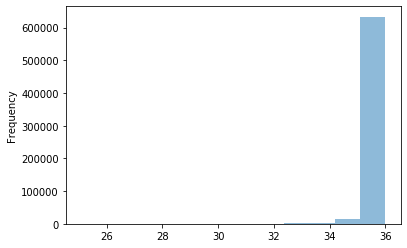

In [41]:
d = df['AVG_QUERY_ALIGN_QUAL']
ax = d.plot.hist(by='LABEL',bins=12, alpha=0.5)

3. Histogram 

In [42]:
df.columns

Index(['AVG_QUERY_ALIGN_QUAL', 'B_BASE_QUAL', 'B_CONTEXT_SCORE', 'B_GC_SCORE', 'B_REL_POS', 'C_BAM_CDEL', 'C_BAM_CINS', 'C_BAM_CMATCH', 'FAMILY_SIZE', 'IS_READ1', 'IS_SECONDARY', 'LABEL', 'MAPQ', 'S_FWD_MISMATCH', 'S_IS_DEL', 'S_IS_END', 'S_IS_INS', 'S_IS_START', 'S_REV_MISMATCH', 'REF_BASE_A', 'REF_BASE_C', 'REF_BASE_G', 'REF_BASE_T'], dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9230ee668>,
      dtype=object)

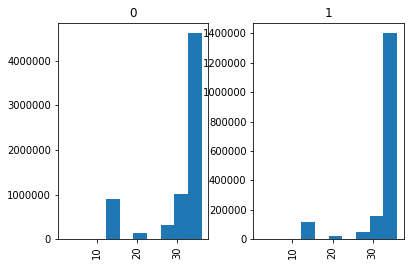

In [6]:
df['BASE_QUALITY'].hist(by=df['LABEL'])

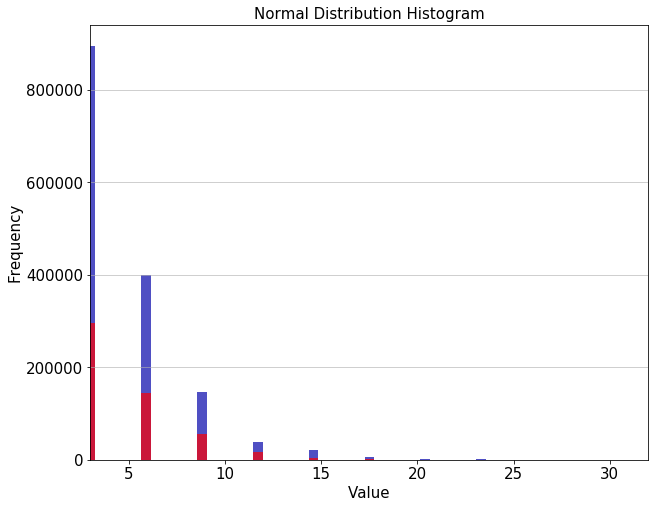

In [151]:
np_hist = df['FAMILY_SIZE'][df.LABEL==0].to_numpy()
np_hist1 = df['FAMILY_SIZE'][df.LABEL==1].to_numpy()
hist,bin_edges = np.histogram(np_hist)
hist1,bin_edges = np.histogram(np_hist1)
plt.figure(figsize=[10,8])

plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.bar(bin_edges[:-1], hist1, width = 0.5, color='Red',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

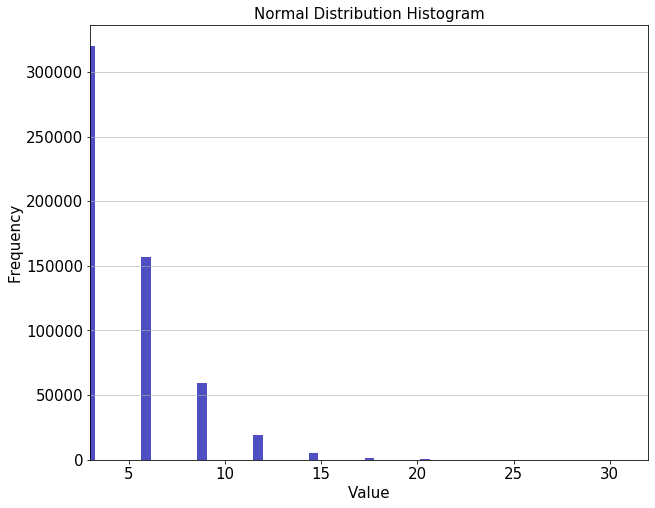

In [44]:
np_hist = df['FAMILY_SIZE'][df.LABEL==1].to_numpy()
hist,bin_edges = np.histogram(np_hist)
plt.figure(figsize=[10,8])

plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

In [57]:
df.columns

Index(['AVG_QUERY_ALIGN_QUAL', 'B_BASE_QUAL', 'B_CONTEXT_SCORE', 'B_GC_SCORE', 'B_REL_POS', 'C_BAM_CDEL', 'C_BAM_CINS', 'C_BAM_CMATCH', 'FAMILY_SIZE', 'IS_READ1', 'IS_SECONDARY', 'LABEL', 'MAPQ', 'S_FWD_MISMATCH', 'S_IS_DEL', 'S_IS_END', 'S_IS_INS', 'S_IS_START', 'S_REV_MISMATCH', 'REF_BASE_A', 'REF_BASE_C', 'REF_BASE_G', 'REF_BASE_T'], dtype='object')

Frequency Histograms

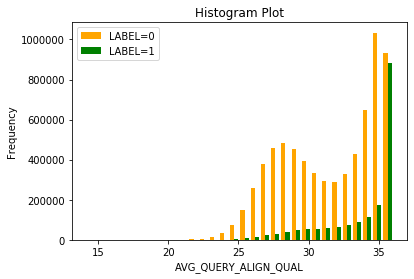

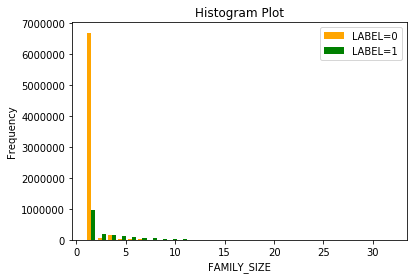

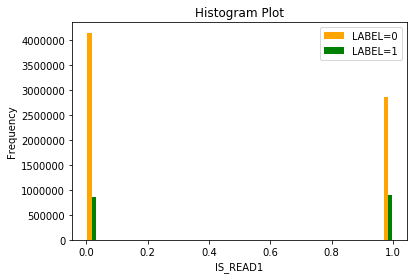

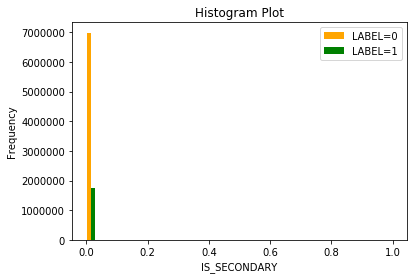

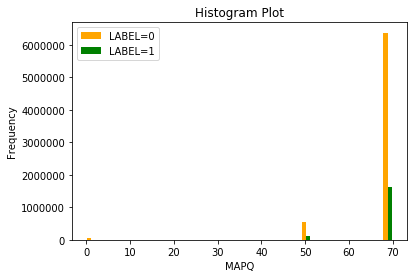

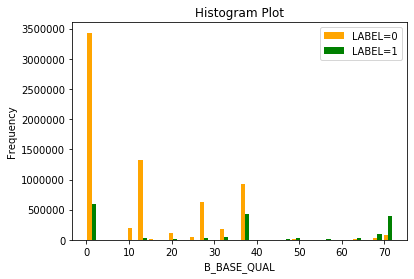

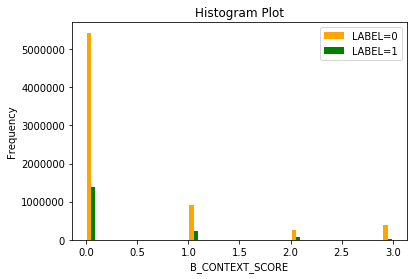

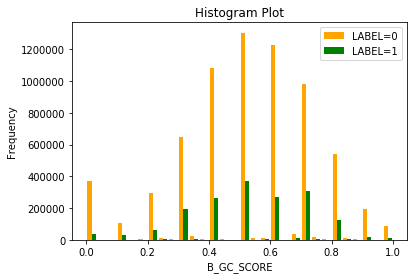

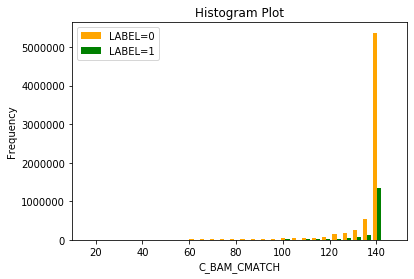

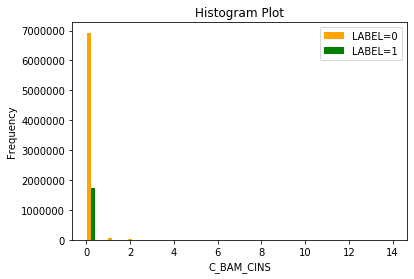

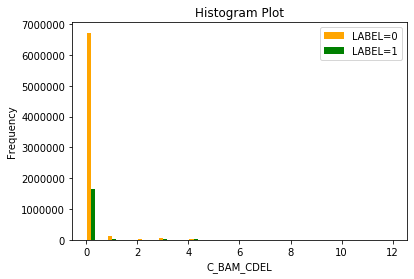

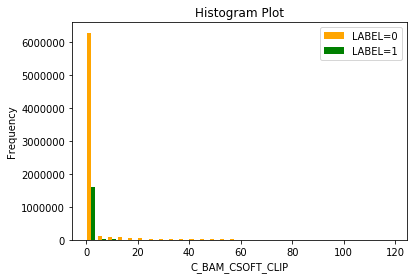

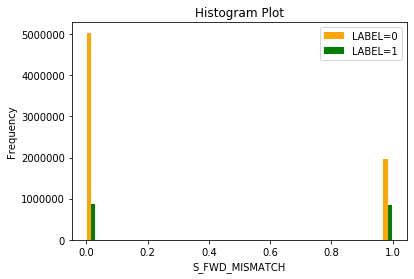

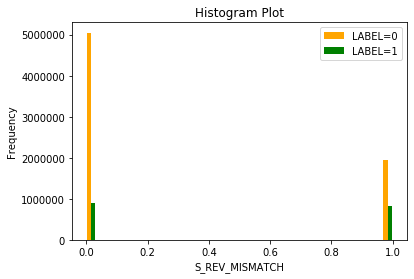

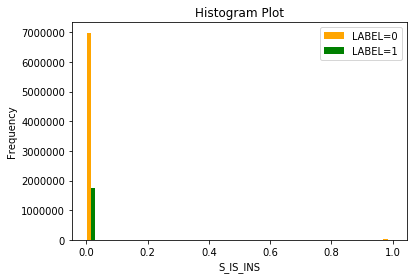

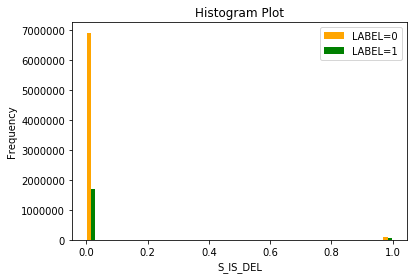

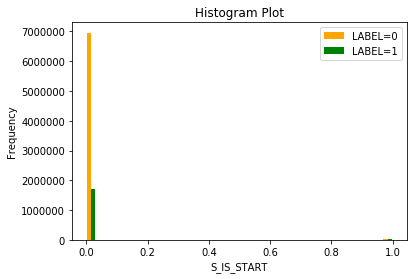

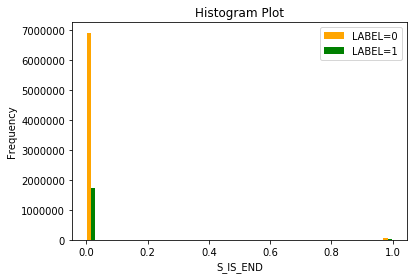

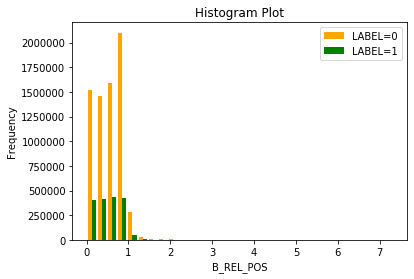

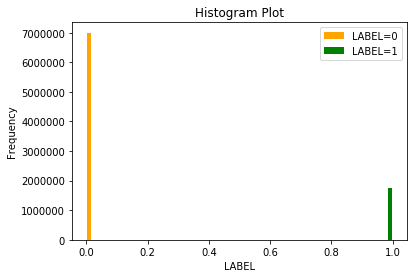

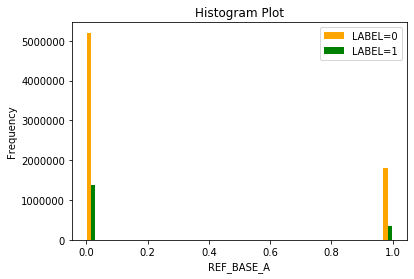

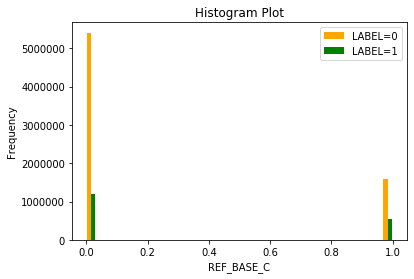

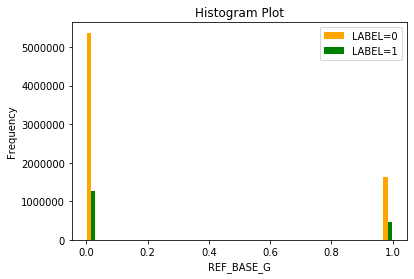

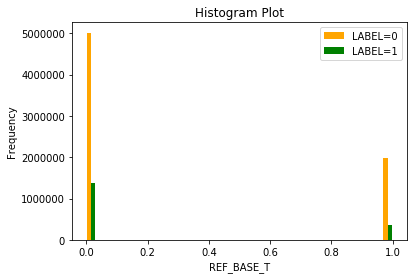

In [45]:
col = df.columns
for c in col:
    avg_score_0 = df[c][df.LABEL==0]
    legend = ['LABEL=0', 'LABEL=1']
    avg_score_1 = df[c][df.LABEL==1]
    plt.hist([avg_score_0,avg_score_1], color=['orange', 'green'], bins=30)
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.legend(legend)
    #plt.xticks(range(30, 37))
    #plt.yticks(range(1, 20))
    plt.title('Histogram Plot')
    plt.show()

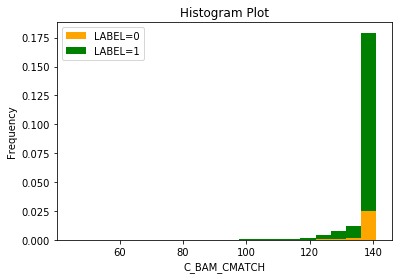

In [64]:
c = 'C_BAM_CMATCH'
# Normalize
#kwargs = dict(alpha=0.5,density=True, stacked=True)
kwargs = dict(density=True,stacked=True)
avg_score_0 = df[c][df.LABEL==0]
legend = ['LABEL=0', 'LABEL=1']
avg_score_1 = df[c][df.LABEL==1]
plt.hist([avg_score_0,avg_score_1],**kwargs, color=['orange', 'green'], bins=20)
plt.xlabel(c)
plt.ylabel("Frequency")
plt.legend(legend)
#plt.xticks(range(30, 37))
#plt.yticks(range(1, 20))
plt.title('Histogram Plot')
plt.show()

# Probability Histogram Plot

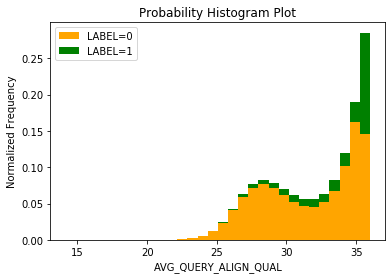

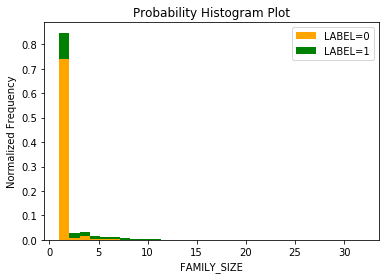

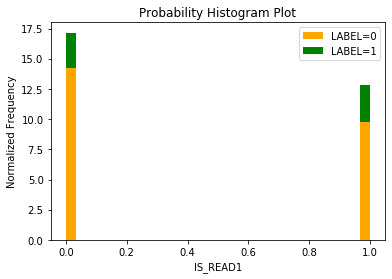

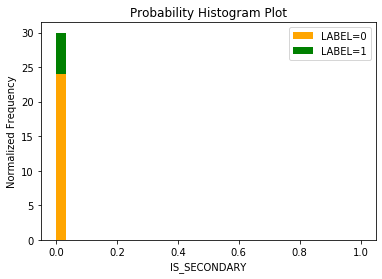

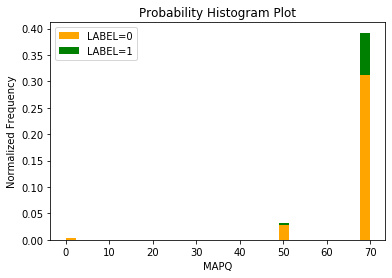

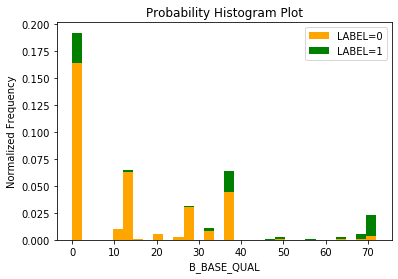

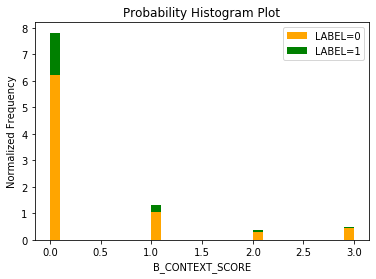

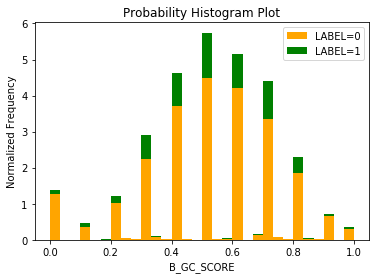

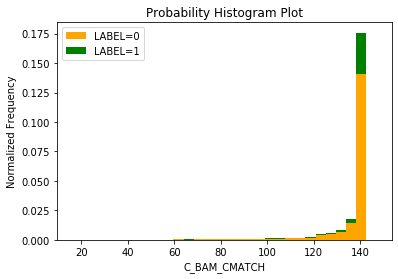

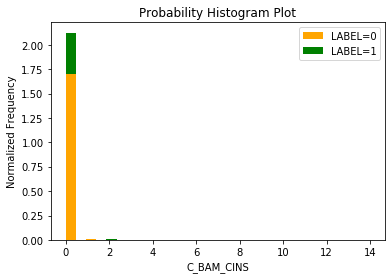

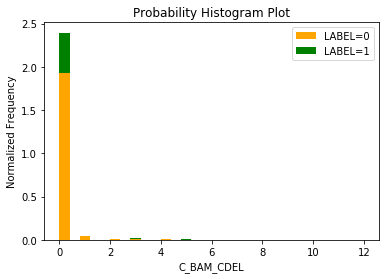

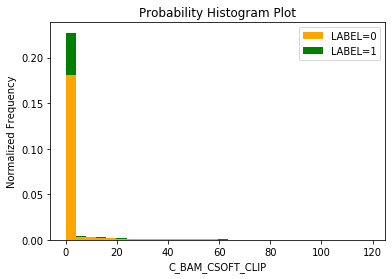

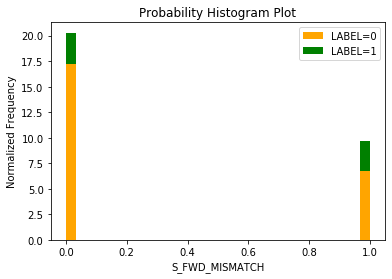

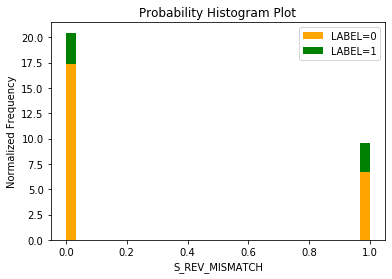

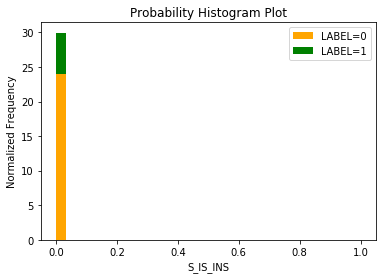

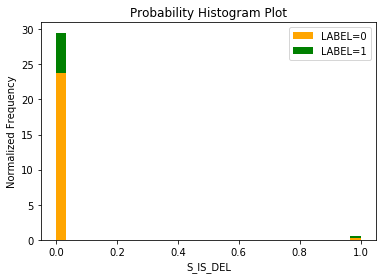

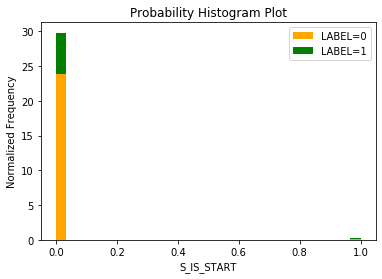

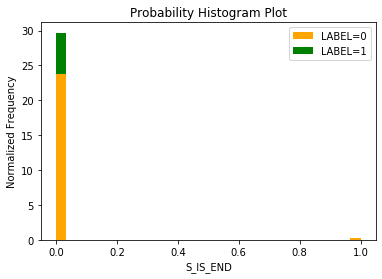

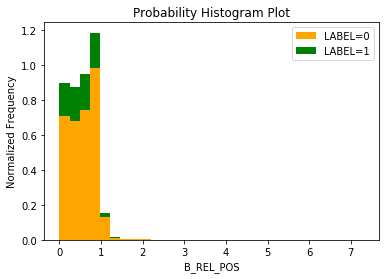

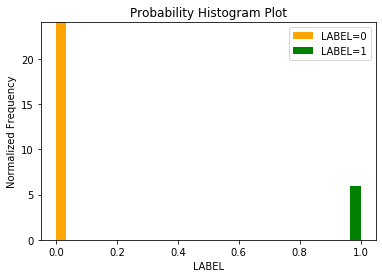

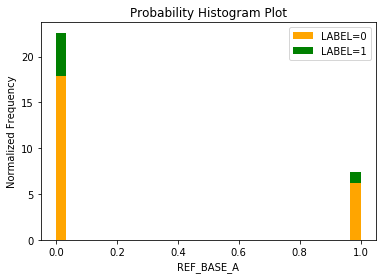

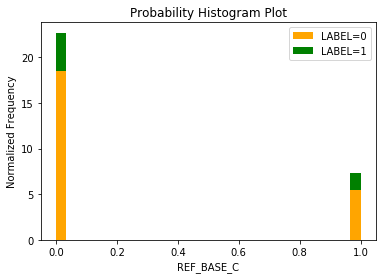

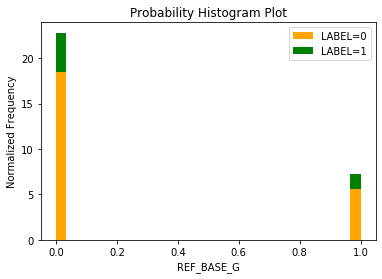

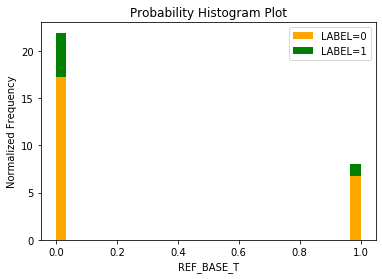

In [44]:
col = df.columns
for c in col:
    kwargs = dict(density=True,stacked = True)
    avg_score_0 = df[c][df.LABEL==0]
    legend = ['LABEL=0', 'LABEL=1']
    avg_score_1 = df[c][df.LABEL==1]
    plt.hist([avg_score_0,avg_score_1],**kwargs,color=['orange', 'green'], bins=30)
    plt.xlabel(c)
    plt.ylabel("Normalized Frequency")
    plt.legend(legend)
    #plt.xticks(range(30, 37))
    #plt.yticks(range(1, 20))
    plt.title('Probability Histogram Plot')
    plt.show()

In [145]:
df['B_GC_SCORE'][df.LABEL==1].value_counts()

0.500    104624
0.700    100527
0.600     82119
0.400     80905
0.300     55523
0.800     34060
0.200     16136
0.000     11667
0.100     10075
1.000      4020
0.900      2999
0.667      2696
0.333      2591
0.750      1460
0.250      1124
0.375       772
0.571       757
0.625       718
0.778       645
0.833       626
0.444       606
0.429       567
0.714       549
0.286       464
0.556       439
0.857       368
0.875       368
0.222       357
0.167       284
0.125       269
0.143       196
0.889       136
0.111        90
Name: B_GC_SCORE, dtype: int64

# 4. Numeric features-kde plots

In [23]:
num_features=['AVG_QUERY_ALIGN_QUAL','B_CONTEXT_SCORE','C_BAM_CMATCH','B_BASE_QUAL','FAMILY_SIZE','B_GC_SCORE','B_REL_POS']
categorical_features = ['IS_READ1','IS_SECONDARY','S_FWD_MISMATCH' ,
                   'S_REV_MISMATCH' ,'S_IS_INS' ,'S_IS_DEL','S_IS_START','S_IS_END','MAPQ','C_BAM_CINS','C_BAM_CDEL']

In [179]:
d2 = df['B_CONTEXT_SCORE'].apply(lambda x: 0.001 if x==0 else x)

In [180]:
d2

0         0.333
1         0.001
2         0.001
3         0.001
4         0.001
5         0.001
6         0.001
7         0.001
8         0.001
9         0.001
10        0.001
11        0.333
12        0.001
13        0.333
14        0.333
15        0.001
16        0.333
17        0.333
18        0.001
19        0.001
20        0.001
21        0.001
22        0.001
23        0.001
24        0.001
25        0.001
26        0.001
27        0.001
28        0.001
29        0.333
30        0.001
31        0.001
32        0.333
33        0.333
34        0.001
35        0.333
36        0.001
37        0.001
38        0.001
39        0.333
40        0.001
41        0.001
42        0.667
43        0.333
44        0.333
45        0.333
46        0.001
47        0.001
48        0.001
49        0.001
50        0.001
51        0.001
52        0.333
53        0.333
54        0.333
55        0.001
56        0.001
57        0.001
58        0.001
59        0.001
60        0.333
61        0.333
62      

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def visualize_numeric_features():
    for column in num_features:
        print(column)
        d1 = df[column]
        sns.kdeplot(d1[df.LABEL == 0],label='Label=0');
        sns.kdeplot(d1[df.LABEL == 1],label='Label=1');
        # beautifying the label
        plt.xlabel('Value')
        plt.ylabel('KDE density')
        plt.show()

AVG_QUERY_ALIGN_QUAL


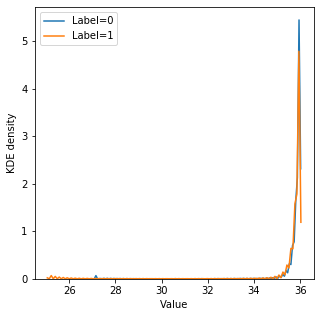

B_CONTEXT_SCORE


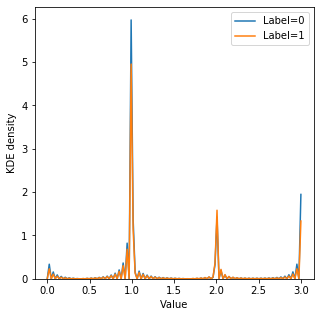

C_BAM_CMATCH


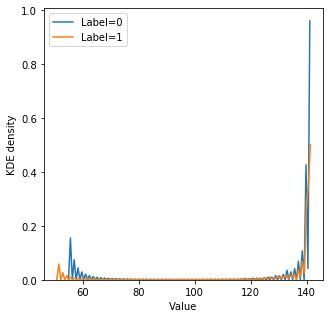

B_BASE_QUAL


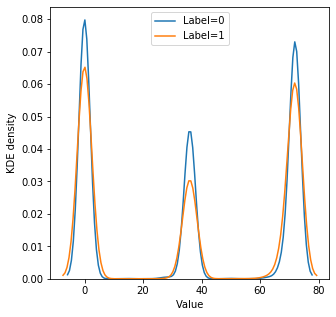

FAMILY_SIZE


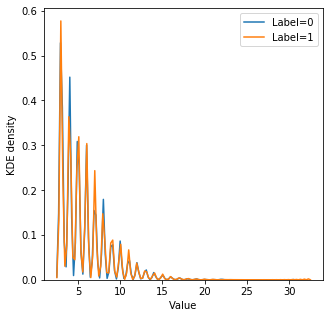

B_GC_SCORE


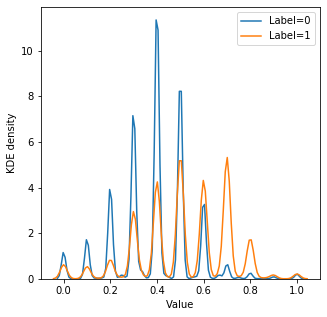

B_REL_POS


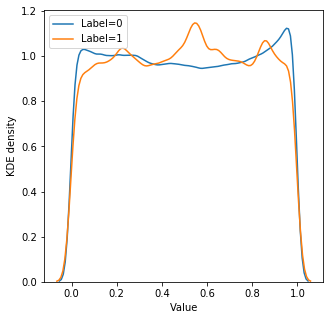

In [153]:
visualize_numeric_features()

4. Numeric Plots-KDE-Cumulative

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def visualize_numeric_features_cumulative():
    for column in num_features:
        print(column)
        d1 = df[column]
        sns.kdeplot(d1[df.LABEL == 0],label='Label=0',cumulative=True);
        sns.kdeplot(d1[df.LABEL == 1],label='Label=1',cumulative=True);
        # beautifying the label
        plt.xlabel('Value')
        plt.ylabel('KDE density')
        plt.show()

AVG_QUERY_ALIGN_QUAL


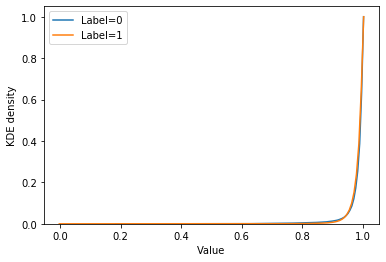

B_CONTEXT_SCORE


/home/prahalad/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/home/prahalad/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/home/prahalad/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/nonparametric/kernels.py:204: RuntimeWarning: invalid value encountered in multiply
  w = 1. / (h * n) * np.sum(self((xs-x)/h), axis=0)
/home/prahalad/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:180: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  args=endog)[0] for i in range(1, gridsize)]


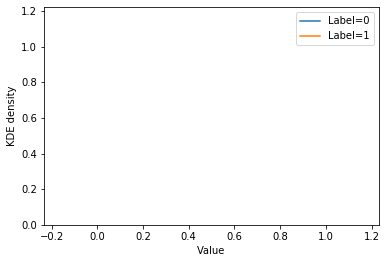

C_BAM_CMATCH


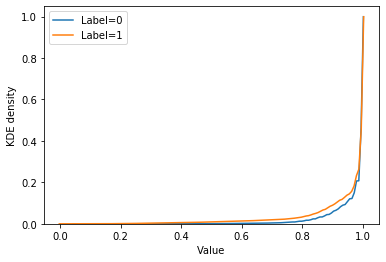

B_BASE_QUAL


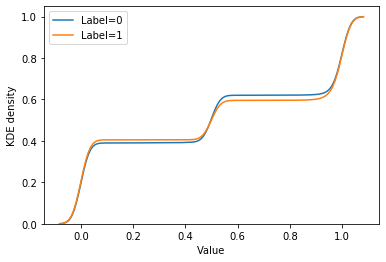

FAMILY_SIZE


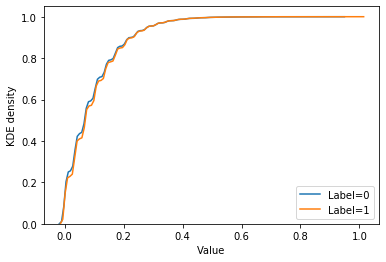

B_GC_SCORE


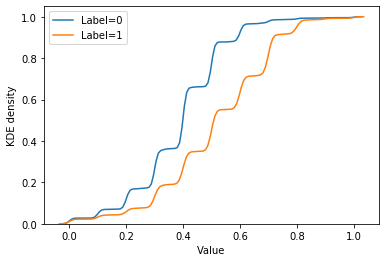

In [116]:
visualize_numeric_features_cumulative()

5. Binary featues plots

In [27]:
binary_features = ['IS_READ1','S_FWD_MISMATCH','S_REV_MISMATCH','REF_BASE_T','REF_BASE_C','REF_BASE_A','REF_BASE_G']

In [42]:
df.columns

Index(['B_GC_SCORE', 'B_REL_POS', 'AVG_QUERY_ALIGN_QUAL', 'C_BAM_CMATCH', 'B_CONTEXT_SCORE', 'REF_BASE_C', 'FAMILY_SIZE', 'B_BASE_QUAL', 'REF_BASE_T', 'S_FWD_MISMATCH', 'S_REV_MISMATCH', 'IS_READ1', 'REF_BASE_G', 'REF_BASE_A', 'LABEL'], dtype='object')

In [52]:
df.S_REV_MISMATCH.value_counts()

1.000    1534518
0.000    1487170
0.412          1
0.264          1
0.327          1
0.304          1
0.920          1
0.932          1
Name: S_REV_MISMATCH, dtype: int64

#    a) Count plot

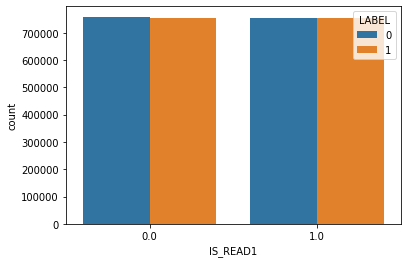

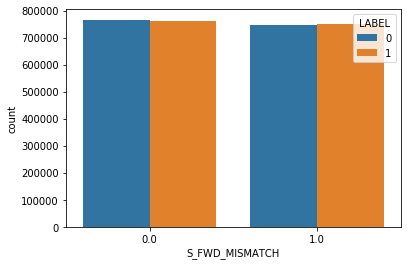

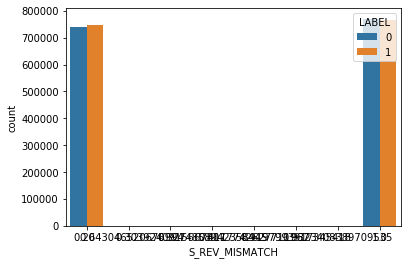

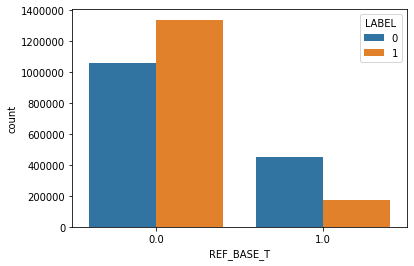

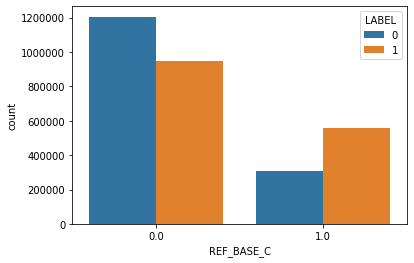

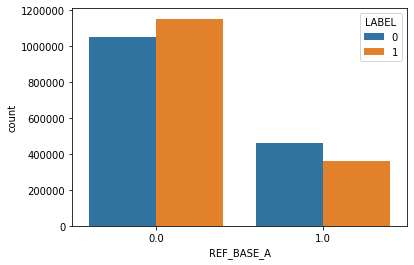

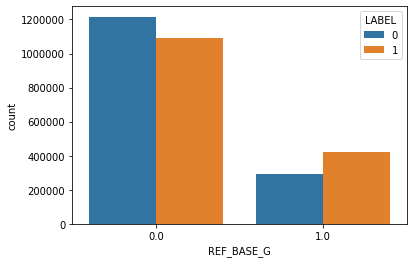

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
for b in binary_features:
    plt.figure()
    sns.countplot(x=df[b], hue='LABEL', data=df)

#   b) Pie plot 

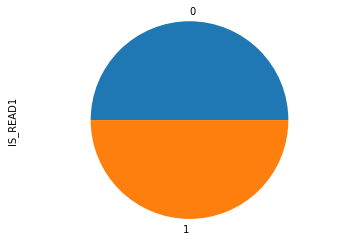

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
df.IS_READ1.groupby(df.LABEL).count().plot(kind='pie')
plt.axis('equal')
plt.show()

# Results Visualization

In [55]:
class_names=['positive','negative']

# Visualize Decision Tree

In [108]:
c = 'B_GC_SCORE'

For single feature decision tree

In [109]:
X = np.array(df[c]).reshape(-1,1)

In [110]:
dec = DecisionTreeClassifier(max_depth=50).fit(X,y)

In [111]:
X5 = pd.DataFrame(df[c])

In [ ]:
X5.columns = c

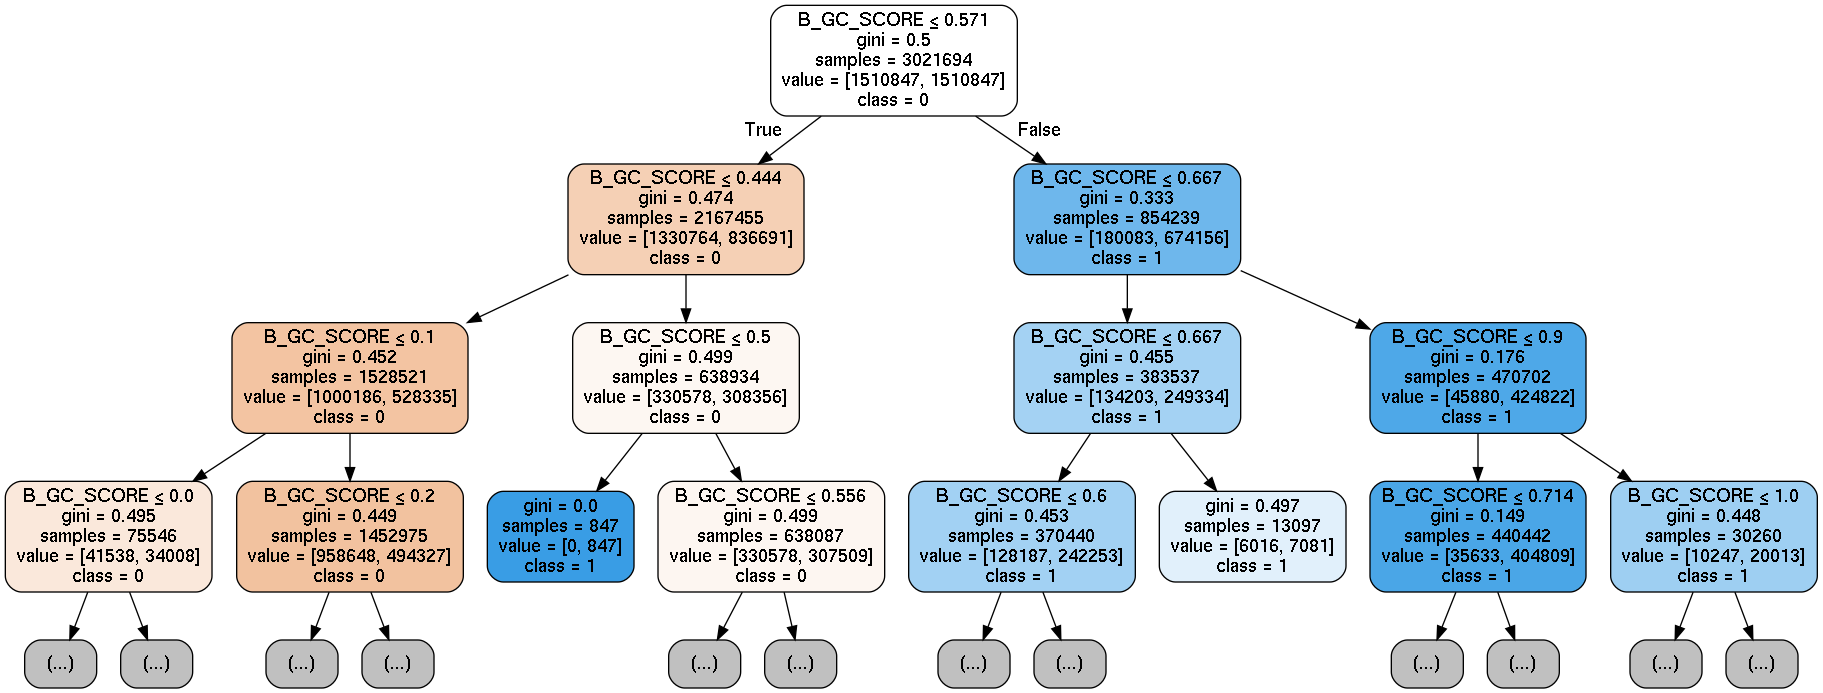

In [114]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dec, out_file=dot_data,max_depth=3,label='all',  
                filled=True, rounded=True,
                special_characters=True,feature_names = X5.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cancer.png')
Image(graph.create_png())

# Visualize Confusion Matrix

In [34]:
import seaborn as sns

In [ ]:
pd.Series(rnd.predict(X)).value_counts()

In [33]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators=100,max_depth=20,class_weight='balanced').fit(X_train,y_train)

In [35]:
dec = DecisionTreeClassifier(max_depth=10).fit(X_train,y_train)

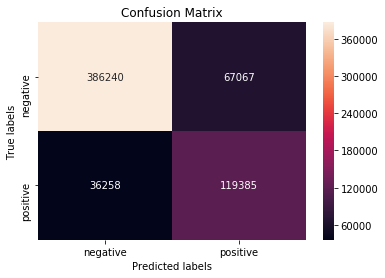

In [47]:
cm = confusion_matrix(y_val, rnd.predict(X_val)) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [48]:
getValScore(rnd,X_val,y_val,X_train,y_train)

------------------------------------
Training
fpr=0.12397923482799705
acc=0.8710027496986029
Log score=4.455480967145814
auc=0.9483812771890378
------------------------------------
Validation:
fpr=0.1479505059485073
acc=0.8303226865916742
Log score=5.86053485114541
auc=0.9053250155786876


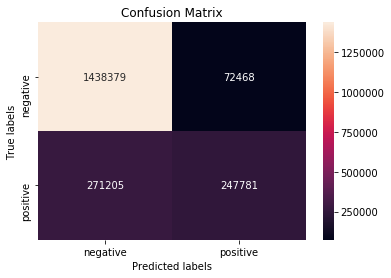

In [37]:
cm = confusion_matrix(y, dec.predict(X)) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

# Feature importance Chart

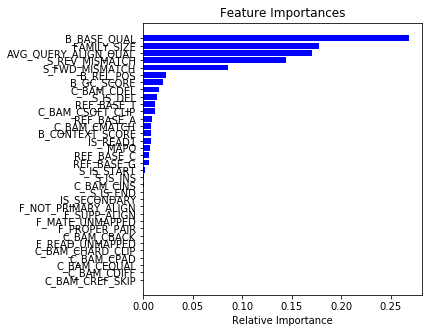

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
features = X.columns
importances = rnd.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
importances = dec.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# ROC Curve - Method I

AUC: 0.906


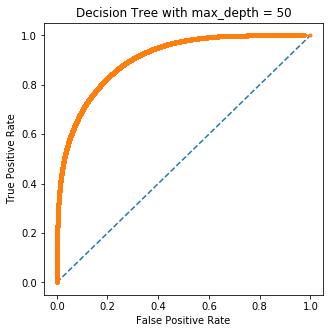

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
y_score = y_val
proba = rnd.predict_proba(X_val)
probs = proba[:,1]
# calculate AUC
auc = roc_auc_score(y_val, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Decision Tree with max_depth = 50')
# show the plot
pyplot.show()

AUC: 0.905


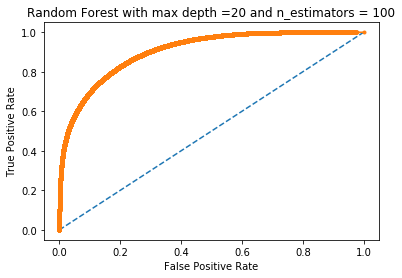

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
y_score = y_val
proba = rnd.predict_proba(X_val)
probs = proba[:,1]
# calculate AUC
auc = roc_auc_score(y_val, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Random Forest with max depth =20 and n_estimators = 100')
# show the plot
pyplot.show()

# Plot ROC Curves - Method II

In [196]:
tn, fp, fn, tp = confusion_matrix(y, dec.predict(X)).ravel()
print("fpr="+str(1-fp/(tn+fp)))
print("acc="+str(accuracy_score(y,dec.predict(X))))
print("tpr="+str(tp/(tp+fn)))

fpr=0.9221244771972278
acc=0.9089821801942883
tpr=0.895839883191349


In [197]:
dec.predict_proba(X)[:,1]

array([1.        , 0.1       , 0.42857143, ..., 0.66666667, 1.        ,
       1.        ])

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt

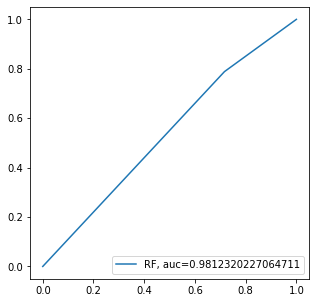

In [43]:
auc = metrics.roc_auc_score(y_val, rnd.predict_proba(X_val)[:,1])
plt.plot(fpr,tpr,label="RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [201]:
1-fpr[np.where(thresholds==0.5)[0][0]]

0.9080954113871704

In [97]:
tpr[np.where(thresholds==0.5)[0][0]]

array([0.45499566, 0.4550342 , 0.4550342 , ..., 1.        , 1.        ,
       1.        ])

In [110]:
thresholds[np.where(fpr<=0.02)]

array([2.        , 1.        , 0.99999424, ..., 0.76766231, 0.76766145,
       0.76766102])

In [115]:
roc=percentile_list = pd.DataFrame(
    {'fpr': fpr,
     'tpr': tpr,
     'threshhold': thresholds
    })

In [90]:
roc[:]

fpr   tpr  threshhold
0      0.000 0.000       2.000
1      0.000 0.001       1.000
2      0.000 0.001       1.000
3      0.000 0.001       1.000
4      0.000 0.001       1.000
5      0.000 0.001       1.000
6      0.000 0.001       1.000
7      0.000 0.001       1.000
8      0.000 0.002       1.000
9      0.000 0.002       1.000
10     0.000 0.002       1.000
11     0.000 0.002       1.000
12     0.000 0.002       1.000
13     0.000 0.002       1.000
14     0.000 0.002       1.000
15     0.000 0.002       1.000
16     0.000 0.002       1.000
17     0.000 0.002       1.000
18     0.000 0.002       1.000
19     0.000 0.002       1.000
20     0.000 0.002       1.000
21     0.000 0.002       1.000
22     0.000 0.002       1.000
23     0.000 0.002       1.000
24     0.000 0.002       1.000
25     0.000 0.002       1.000
26     0.000 0.002       1.000
27     0.000 0.002       1.000
28     0.000 0.002       1.000
29     0.000 0.002       1.000
30     0.000 0.002       1.000
31     0.000 0.002       1.000
32     0.000 0.002       1.000
33     0.000 0.002       1.000
34     0.000 0.003       1.000
35     0.000 0.003       1.000
36     0.000 0.003       1.000
37     0.000 0.003       1.000
38     0.000 0.003       1.000
39     0.000 0.003       1.000
40     0.000 0.003       1.000
41     0.000 0.003       1.000
42     0.000 0.003       1.000
43     0.000 0.003       1.000
44     0.000 0.003       1.000
45     0.000 0.003       1.000
46     0.000 0.003       1.000
47     0.000 0.003       1.000
48     0.000 0.003       1.000
49     0.000 0.003       1.000
50     0.000 0.003       1.000
51     0.000 0.003       1.000
52     0.000 0.003       1.000
53     0.000 0.003       1.000
54     0.000 0.003       1.000
55     0.000 0.003       1.000
56     0.000 0.003       1.000
57     0.000 0.003       1.000
58     0.000 0.003       1.000
59     0.000 0.003       0.999
60     0.000 0.003       0.999
61     0.000 0.003       0.999
62     0.000 0.003       0.999
63     0.000 0.003       0.999
64     0.000 0.003       0.999
65     0.000 0.003       0.999
66     0.000 0.003       0.999
67     0.000 0.003       0.999
68     0.000 0.003       0.999
69     0.000 0.003       0.999
70     0.000 0.004       0.999
71     0.000 0.004       0.999
72     0.000 0.004       0.999
73     0.000 0.004       0.999
74     0.000 0.004       0.999
75     0.000 0.004       0.999
76     0.000 0.004       0.999
77     0.000 0.004       0.999
78     0.000 0.004       0.999
79     0.000 0.004       0.999
80     0.000 0.004       0.999
81     0.000 0.004       0.999
82     0.000 0.004       0.999
83     0.000 0.004       0.999
84     0.000 0.004       0.999
85     0.000 0.004       0.999
86     0.000 0.004       0.999
87     0.000 0.004       0.999
88     0.000 0.004       0.999
89     0.000 0.004       0.999
90     0.000 0.004       0.999
91     0.000 0.004       0.999
92     0.000 0.004       0.999
93     0.000 0.005       0.999
94     0.000 0.005       0.999
95     0.000 0.005       0.999
96     0.000 0.005       0.999
97     0.000 0.005       0.999
98     0.000 0.005       0.999
99     0.000 0.005       0.999
100    0.000 0.005       0.999
101    0.000 0.005       0.999
102    0.000 0.005       0.999
103    0.000 0.005       0.999
104    0.000 0.005       0.999
105    0.000 0.005       0.999
106    0.000 0.005       0.999
107    0.000 0.005       0.999
108    0.000 0.005       0.999
109    0.000 0.005       0.999
110    0.000 0.006       0.998
111    0.000 0.006       0.998
112    0.000 0.006       0.998
113    0.000 0.006       0.998
114    0.000 0.006       0.998
115    0.000 0.006       0.998
116    0.000 0.006       0.998
117    0.000 0.006       0.998
118    0.000 0.006       0.998
119    0.000 0.006       0.998
120    0.000 0.006       0.998
121    0.000 0.006       0.998
122    0.000 0.006       0.998
123    0.000 0.007       0.998
124    0.000 0.007       0.998
125    0.000 0.007       0.998
126    0.000 0.007       0.998
127    0.000 0.007       0.998
128    0.0

In [206]:
accuracy_score(dec.predict(X),y)

0.9089821801942883

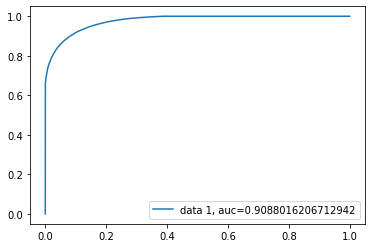

In [207]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, dec.predict_proba(X_val)[:,1], pos_label=1)
auc = metrics.roc_auc_score(y_val, dec.predict(X_val))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
roc1=percentile_list = pd.DataFrame(
    {'fpr': fpr,
     'tpr': tpr,
     'threshhold': thresholds
    })

In [104]:
roc[roc.fpr<=0.003].tail()

fpr   tpr  threshhold
3544 0.003 0.240       0.872
3545 0.003 0.240       0.872
3546 0.003 0.240       0.872
3547 0.003 0.240       0.872
3548 0.003 0.240       0.872

In [135]:
roc[roc.fpr<=0.01].tail()

fpr   tpr  threshhold
7681 0.010 0.365       0.844
7682 0.010 0.365       0.844
7683 0.010 0.365       0.844
7684 0.010 0.365       0.844
7685 0.010 0.365       0.844

# Multiple ROC Curve 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators=100,max_depth=20,class_weight='balanced').fit(X_train,y_train)

In [23]:
from sklearn.externals import joblib
joblib.dump(rnd, 'RF.pkl')
model = joblib.load('RF.pkl')

In [23]:
from sklearn.externals import joblib
rnd = joblib.load('RF.pkl')

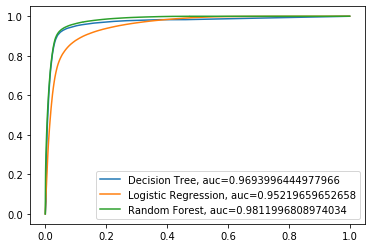

In [34]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

pred = model_dec.predict_proba(X_val)[:,1]
label = y_val
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

pred = model_lr.predict_proba(X_val)[:,1]
label = y_val
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))

pred = rnd.predict_proba(X_val)[:,1]
label = y_val
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))

plt.legend(loc=0)

# Average Precision score

In [31]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y,clf.predict_proba(X)[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.67


# Precisiom recall curve

Average precision-recall score: 0.93


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

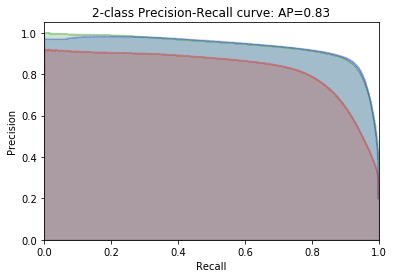

In [29]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y,model_dec.predict_proba(X)[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y, model_dec.predict_proba(X)[:,1])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

average_precision = average_precision_score(y,rnd.predict_proba(X)[:,1])

#print('Average precision-recall score: {0:0.2f}'.format(
#      average_precision))
average_precision = average_precision_score(y,model_lr.predict_proba(X)[:,1])

#print('Average precision-recall score: {0:0.2f}'.format(
#      average_precision))

precision, recall, _ = precision_recall_curve(y, model_lr.predict_proba(X)[:,1])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

precision, recall, _ = precision_recall_curve(y, rnd.predict_proba(X)[:,1])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='g', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# ALL features ROC-single feature ML model

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
df.drop(columns=['QNAME'],axis=1,inplace=True)
df.drop(columns=['REGION'],axis=1,inplace=True)

In [17]:
df.columns

Index(['AVG_QUERY_ALIGN_QUAL', 'FAMILY_SIZE', 'IS_READ1', 'IS_SECONDARY', 'MAPQ', 'B_BASE_QUAL', 'B_CONTEXT_SCORE', 'B_GC_SCORE', 'C_BAM_CMATCH', 'C_BAM_CINS', 'C_BAM_CDEL', 'C_BAM_CSOFT_CLIP', 'S_FWD_MISMATCH', 'S_REV_MISMATCH', 'S_IS_INS', 'S_IS_DEL', 'S_IS_START', 'S_IS_END', 'B_REL_POS', 'LABEL', 'REF_BASE_A', 'REF_BASE_C', 'REF_BASE_G', 'REF_BASE_T'], dtype='object')

In [18]:
X.columns

Index(['AVG_QUERY_ALIGN_QUAL', 'FAMILY_SIZE', 'IS_READ1', 'IS_SECONDARY', 'MAPQ', 'B_BASE_QUAL', 'B_CONTEXT_SCORE', 'B_GC_SCORE', 'C_BAM_CMATCH', 'C_BAM_CINS', 'C_BAM_CDEL', 'C_BAM_CSOFT_CLIP', 'S_FWD_MISMATCH', 'S_REV_MISMATCH', 'S_IS_INS', 'S_IS_DEL', 'S_IS_START', 'S_IS_END', 'B_REL_POS', 'REF_BASE_A', 'REF_BASE_C', 'REF_BASE_G', 'REF_BASE_T'], dtype='object')

In [19]:
X.shape

(8740394, 23)

In [35]:
#X=df['FAMILY_SIZE']
X=df.drop('LABEL',axis=1)
y=df.LABEL
#X=(np.array(X)).reshape(-1,1)
y=y.astype('int')

In [37]:
X.drop(columns=['QNAME'],axis=1,inplace=True)
X.drop(columns=['REGION'],axis=1,inplace=True)

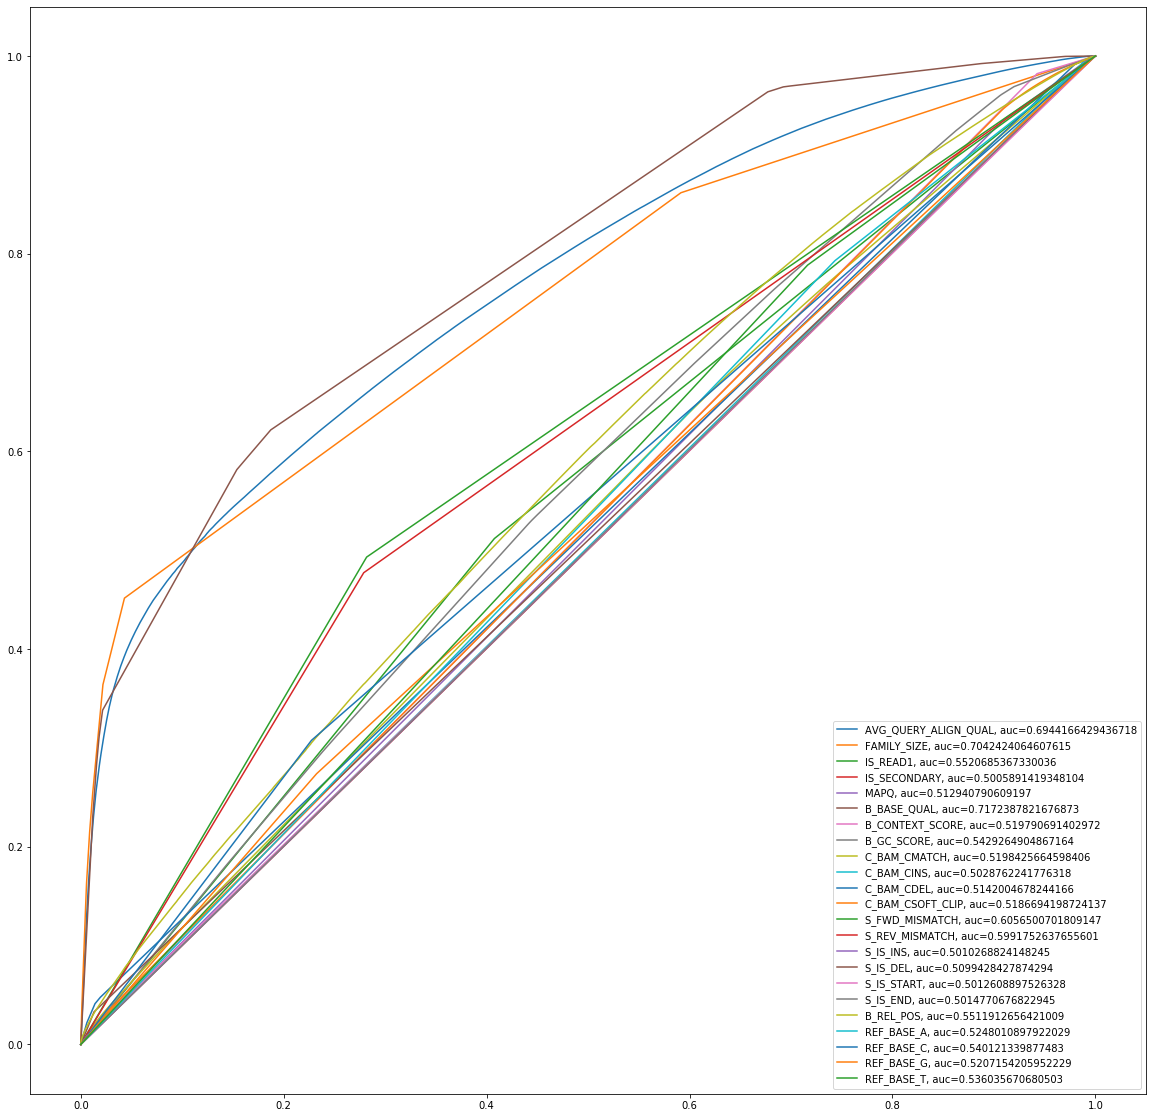

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(20,20))
for feat in X.columns:
    dec=RandomForestClassifier(random_state=0,n_estimators=100,max_depth=20,class_weight='balanced').fit(np.array(X[feat]).reshape(-1,1),y)
    fpr, tpr, thresholds = roc_curve(y, dec.predict_proba(np.array(X[feat]).reshape(-1,1))[:,1], pos_label=1)
    auc = roc_auc_score(y, dec.predict(np.array(X[feat]).reshape(-1,1)))
    plt.plot(fpr,tpr,label=str(feat)+", auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Boosting Algos

# 1. AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [26]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [27]:
predictions = classifier.predict(X_val)

In [28]:
confusion_matrix(y_val, predictions)

array([[435258,  18049],
       [101587,  54056]])

In [56]:
classifier.feature_importances_

array([0.105, 0.235, 0.03 , 0.255, 0.155, 0.1  , 0.065, 0.005, 0.   ,
       0.02 , 0.005, 0.01 , 0.005, 0.01 ])

In [ ]:
getValScore(classifier,X_val,y_val,X_train,y_train)

------------------------------------
Training
fpr=0.040201789057624296
acc=0.8028753950888285
Log score=6.808466576144322
auc=0.7832836544707595
------------------------------------
Validation:
fpr=0.039816283445876635
acc=0.8035372362262911
Log score=6.785607167609083


# AdaBoostGridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

In [ ]:
adaboost_model = AdaBoostClassifier()
parameters = {'learning_rate': [0.05], #so called `eta` value
              'n_estimators': [5,100,1000,2000], #number of trees, change it to 1000 for better results
             }
clf = GridSearchCV(adaboost_model, parameters, n_jobs=-1, 
                   scoring=scoring, 
                   cv=10,
                   verbose=10,
                  refit='fpr')
clf.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 60.8min
/home/prahalad/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 1280.1min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed: 1362.6min remaining: 71.7min


In [ ]:
pd.DataFrame(clf.cv_results_)[['param_n_estimators',
                                         'mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_tpr','std_test_tpr','mean_test_tnr','std_test_tnr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']]

In [ ]:
pd.DataFrame(clf.cv_results_)[['param_n_estimators',
                                         'mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_tpr','std_test_tpr','mean_test_tnr','std_test_tnr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']].to_csv('AdaBoost.csv',index=False)

In [ ]:
getValScore(clf,X_val,y_val,X_train,y_train)

# XGboost Algo

In [16]:
import xgboost as xgb

In [18]:
xgb_model = xgb.XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6,7,8],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5,100,1000], #number of trees, change it to 1000 for better results
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
                   scoring=scoring, 
                   cv=10,
                   verbose=10,
                  refit='fpr')
clf.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   34.0s
/home/prahalad/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 81.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 91.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 150.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 1207.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 1235.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 1368.6min finishe

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_...
                         'silent': [1], 'subsample': [0.8]},
             pre_dispatch='2*n_jobs', refit='fpr', return_train_score=False,
             scoring={'accuracy': 'accuracy',
                      'auc': make_scorer(custom_auc, needs_proba=True),
                      'fpr': make_scorer(my_fpr, greater_is_better=False),
                      'l

In [19]:
pd.DataFrame(clf.cv_results_)[['param_n_estimators','param_max_depth',
                                         'mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_tpr','std_test_tpr','mean_test_tnr','std_test_tnr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']]

param_n_estimators param_max_depth  mean_test_accuracy  std_test_accuracy  mean_test_fpr  std_test_fpr  mean_test_tpr  std_test_tpr  mean_test_tnr  std_test_tnr  mean_test_logloss  std_test_logloss  mean_test_auc  std_test_auc
0                  5               6               0.801              0.007         -0.016         0.004          0.269         0.040          0.984         0.004             -0.616             0.002          0.803         0.004
1                100               6               0.824              0.001         -0.029         0.001          0.395         0.004          0.971         0.001             -0.401             0.001          0.851         0.002
2               1000               6               0.843              0.001         -0.040         0.001          0.502         0.002          0.960         0.001             -0.352             0.001          0.887         0.001
3                  5               7               0.807              0.006         -0.018         0.005          0.295         0.040          0.982         0.005             -0.614             0.002          0.820         0.002
4                100               7               0.831              0.001         -0.032         0.001          0.432         0.002          0.968         0.001             -0.385             0.002          0.866         0.002
5               1000               7               0.849              0.001         -0.040         0.001          0.525         0.002          0.960         0.001             -0.340             0.001          0.896         0.001
6                  5               8               0.809              0.006         -0.018         0.006          0.306         0.041          0.982         0.006             -0.613             0.002          0.832         0.002
7                100               8               0.836              0.001         -0.034         0.001          0.457         0.002          0.966         0.001             -0.372             0.001          0.877         0.001
8               1000               8               0.854              0.001         -0.040         0.001          0.545         0.002          0.960         0.001             -0.329             0.001          0.903         0.001

In [20]:
pd.DataFrame(clf.cv_results_)[['param_n_estimators',
                                         'mean_test_accuracy','std_test_accuracy','mean_test_fpr','std_test_fpr','mean_test_tpr','std_test_tpr','mean_test_tnr','std_test_tnr','mean_test_logloss','std_test_logloss','mean_test_auc','std_test_auc']].to_csv('XGBoost.csv',index=False)

In [21]:
getValScore(clf,X_val,y_val,X_train,y_train)

------------------------------------
Training
fpr=0.01931463585301738
acc=0.810423518333318
Log score=6.547751204686534
auc=0.8163189414371673
------------------------------------
Validation:
fpr=0.01908199079211219
acc=0.8106429099269233
Log score=6.540173550929514
auc=0.8164853958454547


In [26]:
from sklearn.metrics import classification_report
predicted = clf.predict(X_val)
report = classification_report(y_val, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89    453307
           1       0.85      0.31      0.46    155643

    accuracy                           0.81    608950
   macro avg       0.83      0.65      0.67    608950
weighted avg       0.82      0.81      0.78    608950



In [27]:
from sklearn.externals import joblib
joblib.dump(clf, 'XGBoost.pkl')
model = joblib.load('XGBoost.pkl')

/home/prahalad/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Visualize Random Forest

/home/prahalad/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


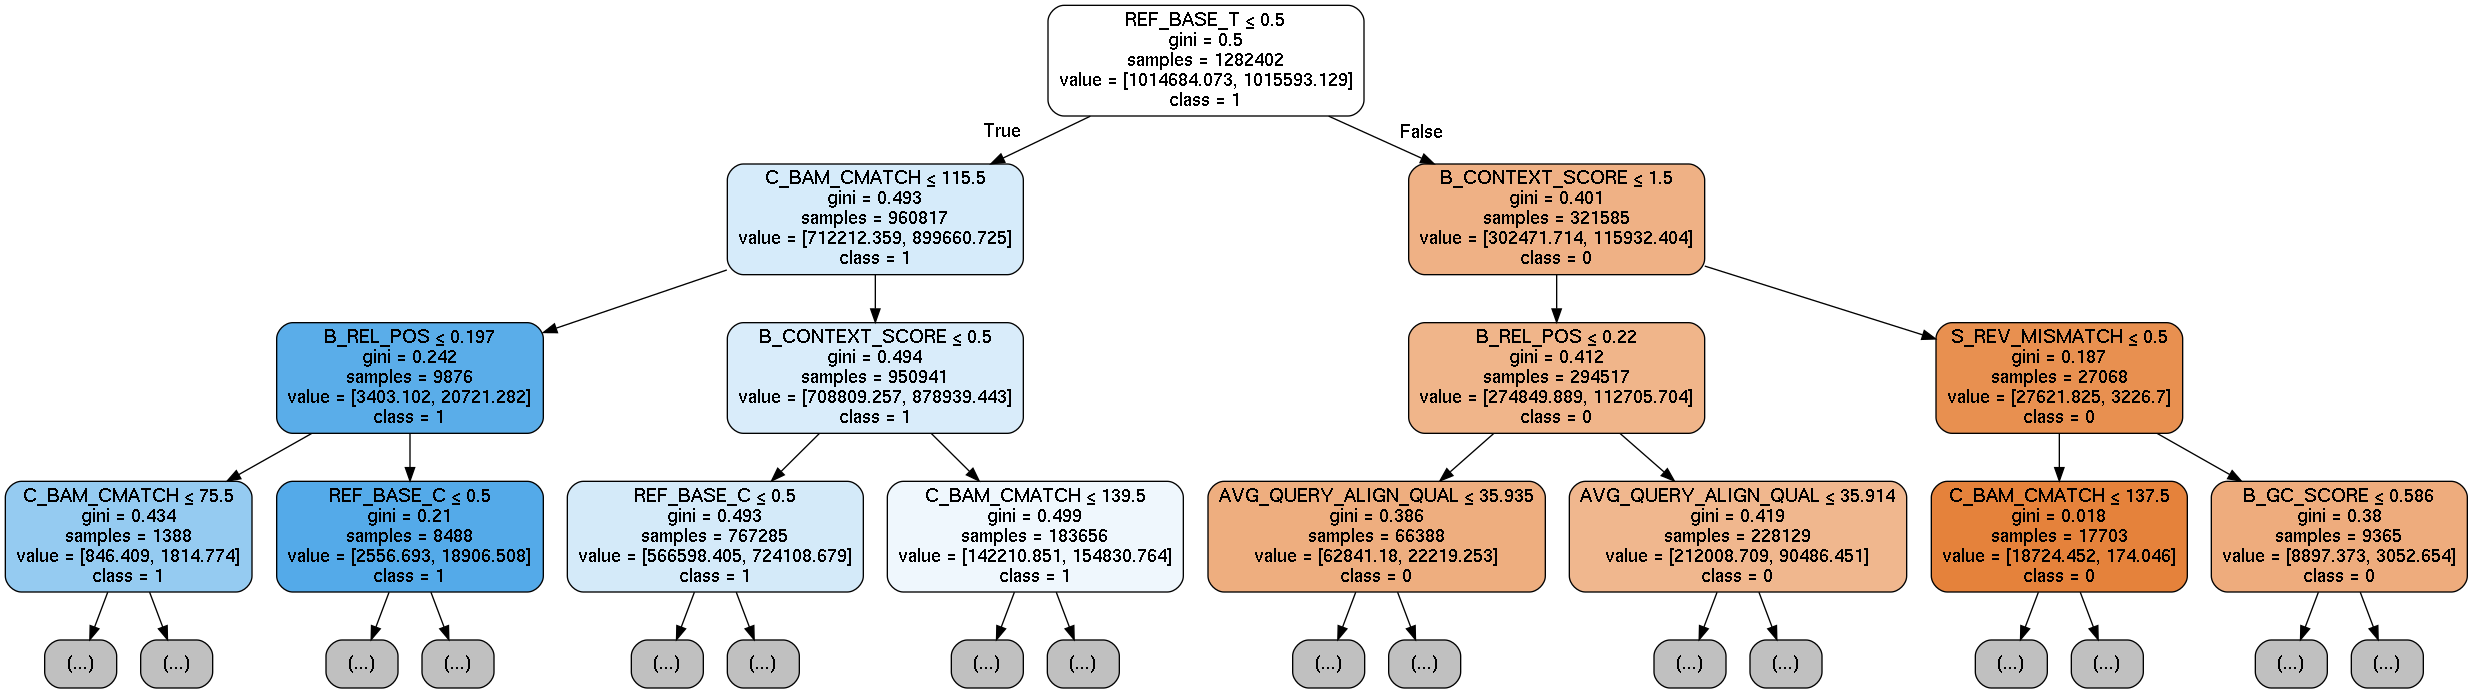

In [40]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
estimator = rnd.estimators_[49]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,max_depth=3,label='all',  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cancer.png')
Image(graph.create_png())

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
estimator = rnd.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',max_depth=3,label='all', 
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

# Strip plot

In [ ]:
# y axis values 
x = ['Pos_Germ','Pos_NonGerm','Neg']
y = pd.DataFrame(pos_germ_gc)
y1 = pd.DataFrame(pos_nongerm_gc)
y2 = pd.concat([y,y1], ignore_index=True, axis=1)
y3 = pd.DataFrame(pos_neg_gc)
y_f = pd.concat([y2,y3], ignore_index=True, axis=1)
# plotting strip plot with seaborn 
ax = sns.stripplot(data = y_f,jitter=True);
# giving labels to x-axis and y-axis 
ax.set(xlabel ='Regions', ylabel ='GC Content') 
#x.legend(['Pos_Germ','Pos_NonGerm','Neg'],loc=9)
ax.legend(['Pos_Germ','Pos_NonGerm','Neg'],bbox_to_anchor=(0.35,-0.05))
# giving title to the plot 
plt.title('GC Content on refrence genome'); 
  
# function to show plot 
plt.show() 

# Stats

In [ ]:
x = statistics.mean(pos_germ_gc) 
x1 = statistics.mean(pos_nongerm_gc) 
x2 = statistics.mean(pos_neg_gc) 
x3 = statistics.stdev(pos_germ_gc) 
x4 = statistics.stdev(pos_nongerm_gc) 
x5 = statistics.stdev(pos_neg_gc)
#x6 = statistics.mode(pos_germ_gc) 
#x7 = statistics.mode(pos_nongerm_gc) 
#x8 = statistics.mode(pos_neg_gc) 
# Printing the mean 
print("Mean of pos_germ is :", x) 
print("Mean of pos_nongerm is :", x1)
print("Mean of neg is :", x2) 
print("Std of pos_germ is :", x3) 
print("Std of pos_nongerm is :", x4)
print("Std of neg is :", x5)